# Evaluacion de factores e influencia de los mismos en MH

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor  # Example model
from sklearn.inspection import partial_dependence, PartialDependenceDisplay
from sklearn.model_selection import train_test_split


path_mh = '/notebooks/MH_factores.csv'
path_gd = '/notebooks/GD_factores.csv'

df_mh = pd.read_csv(path_mh)
df_gd = pd.read_csv(path_gd)
display(df_mh)
display(df_gd)

num_clas= {'BCW':2, 'WQ':6, 'MNIST':10, 'FMNIST':10, 'CIFAR':10}



,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.970
1,BCW,1,1,1,0.932
2,BCW,1,1,2,0.890
3,BCW,1,1,4,0.903
4,WQ,2,2,1,0.201
5,WQ,2,2,1,0.167
6,WQ,2,2,2,0.167
7,WQ,2,2,4,0.167
8,MNIST,1,3,2,0.066
9,MNIST,1,3,3,0.115


,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.960
1,BCW,1,1,1,0.980
2,BCW,1,1,2,1.000
3,BCW,1,1,4,0.971
4,WQ,2,2,1,0.436
5,WQ,2,2,1,0.500
6,WQ,2,2,2,0.606
7,WQ,2,2,4,0.607
8,MNIST,1,3,2,0.977
9,MNIST,1,3,3,0.962


In [17]:
df_mh = df_mh.groupby(["Dataset", "Complejidad", "Tamaño", "Modelo"])["Accuracy"].mean().reset_index()
df_gd = df_gd.groupby(["Dataset", "Complejidad", "Tamaño", "Modelo"])["Accuracy"].mean().reset_index()

display(df_mh)
display(df_gd)

,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.88950
1,BCW,1,1,2,0.85750
2,BCW,1,1,4,0.70150
3,CIFAR,3,3,2,0.10800
4,CIFAR,3,3,3,0.10700
5,CIFAR,3,3,4,0.09950
6,FMNIST,2,3,2,0.27300
7,FMNIST,2,3,3,0.10200
8,FMNIST,2,3,4,0.10000
9,MNIST,1,3,2,0.11850


,Dataset,Complejidad,Tamaño,Modelo,Accuracy
0,BCW,1,1,1,0.97525
1,BCW,1,1,2,1.00000
2,BCW,1,1,4,0.97600
3,CIFAR,3,3,2,0.37950
4,CIFAR,3,3,3,0.37850
5,CIFAR,3,3,4,0.31800
6,FMNIST,2,3,2,0.85150
7,FMNIST,2,3,3,0.84200
8,FMNIST,2,3,4,0.78050
9,MNIST,1,3,2,0.97900


In [18]:
df_mh['Scaled_Accuracy'] = df_mh.apply(
    lambda row: (row['Accuracy'] - 1 / num_clas[row['Dataset']]) / (1 - 1 / num_clas[row['Dataset']]), 
    axis=1
)

df_gd['Scaled_Accuracy'] = df_gd.apply(
    lambda row: (row['Accuracy'] - 1 / num_clas[row['Dataset']]) / (1 - 1 / num_clas[row['Dataset']]), 
    axis=1
)

In [19]:
df_mh.to_csv('/notebooks/MH_factores2.csv', sep=',')
df_gd.to_csv('/notebooks/GD_factores2.csv', sep=',')
display(df_mh)
display(df_gd)

,Dataset,Complejidad,Tamaño,Modelo,Accuracy,Scaled_Accuracy
0,BCW,1,1,1,0.88950,0.779000
1,BCW,1,1,2,0.85750,0.715000
2,BCW,1,1,4,0.70150,0.403000
3,CIFAR,3,3,2,0.10800,0.008889
4,CIFAR,3,3,3,0.10700,0.007778
5,CIFAR,3,3,4,0.09950,-0.000556
6,FMNIST,2,3,2,0.27300,0.192222
7,FMNIST,2,3,3,0.10200,0.002222
8,FMNIST,2,3,4,0.10000,0.000000
9,MNIST,1,3,2,0.11850,0.020556


,Dataset,Complejidad,Tamaño,Modelo,Accuracy,Scaled_Accuracy
0,BCW,1,1,1,0.97525,0.950500
1,BCW,1,1,2,1.00000,1.000000
2,BCW,1,1,4,0.97600,0.952000
3,CIFAR,3,3,2,0.37950,0.310556
4,CIFAR,3,3,3,0.37850,0.309444
5,CIFAR,3,3,4,0.31800,0.242222
6,FMNIST,2,3,2,0.85150,0.835000
7,FMNIST,2,3,3,0.84200,0.824444
8,FMNIST,2,3,4,0.78050,0.756111
9,MNIST,1,3,2,0.97900,0.976667


In [20]:
##MH

X_mh = df_mh.drop(columns=['Dataset', 'Accuracy', 'Scaled_Accuracy'])
y_mh = df_mh['Scaled_Accuracy']

model_mh = RandomForestRegressor(random_state=42)
model_mh.fit(X_mh, y_mh)


##GD

X_gd = df_gd.drop(columns=['Dataset', 'Accuracy', 'Scaled_Accuracy'])
y_gd = df_gd['Scaled_Accuracy']

model_gd = RandomForestRegressor(random_state=42)
model_gd.fit(X_gd, y_gd)

RandomForestRegressor(random_state=42)

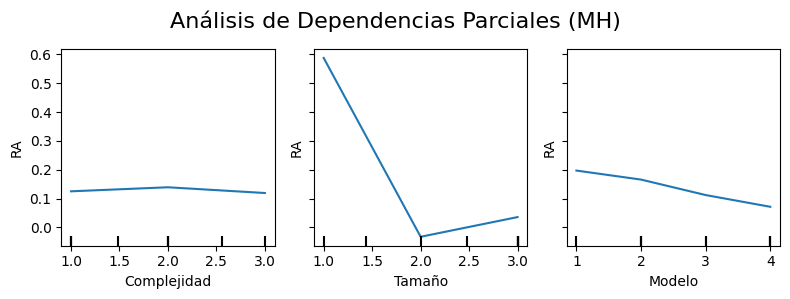

In [21]:
# Multiple features (can include pairs for interaction effects)
features = ['Complejidad', 'Tamaño', 'Modelo']  # Replace with column names
feature_indices = [X_mh.columns.get_loc(f) for f in features]

# Calculate partial dependence
pdp_result = partial_dependence(model_mh, X_mh, feature_indices)

# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)  # Shared y-axis for consistency
PartialDependenceDisplay.from_estimator(model_mh, X_mh, feature_indices, ax=axs)

# Set the title at the top of the figure
plt.suptitle('Análisis de Dependencias Parciales (MH)', fontsize=16)

# Set "Performance" label between subplots
for ax in axs:
    ax.set_ylabel('RA')  # Remove default ylabel from individual subplots
    for line in ax.get_lines():
        line.set_antialiased(True)

# Adjust label for the shared y-axis (set it between subplots)
#fig.text(0.04, 0.5, 'Performance', va='center', rotation='vertical', fontsize=12)

# Adjust layout and spacing to make sure everything fits properly
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top margin for the title

plt.savefig("pda.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

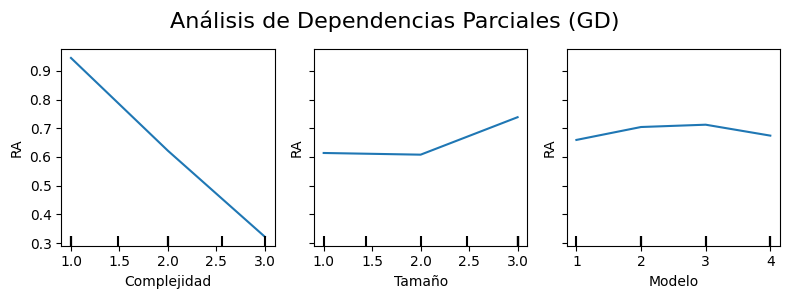

In [22]:
# Multiple features (can include pairs for interaction effects)
features = ['Complejidad', 'Tamaño', 'Modelo']  # Replace with column names
feature_indices = [X_mh.columns.get_loc(f) for f in features]

# Calculate partial dependence
pdp_result = partial_dependence(model_gd, X_gd, feature_indices)


# Create the figure and subplots
fig, axs = plt.subplots(1, 3, figsize=(8, 3), sharey=True)  # Shared y-axis for consistency
PartialDependenceDisplay.from_estimator(model_gd, X_gd, feature_indices, ax=axs)


# Set the title at the top of the figure
plt.suptitle('Análisis de Dependencias Parciales (GD)', fontsize=16)

# Set "Performance" label between subplots
for ax in axs:
    ax.set_ylabel('RA')  # Remove default ylabel from individual subplots
    for line in ax.get_lines():
        line.set_antialiased(True)

# Adjust label for the shared y-axis (set it between subplots)
#fig.text(0.04, 0.5, 'Performance', va='center', rotation='vertical', fontsize=12)

# Adjust layout and spacing to make sure everything fits properly
plt.tight_layout()
plt.subplots_adjust(top=0.85)  # Adjust the top margin for the title

plt.savefig("pda_gd.png", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

# Análisis complejidad computacional

In [2]:
import copy
import pandas as pd
path_gd = '/notebooks/tiempos_rmsprop.csv'
path_mh = '/notebooks/tiempos_shade_ils.csv'

df_mh = pd.read_csv(path_mh)
df_gd = pd.read_csv(path_gd)
#display(df_mh)
#display(df_gd)

df = copy.copy(df_mh)
df.rename(columns={'Tiempo':'Tiempo MH'}, inplace=True)
df_gd.rename(columns={'Tiempo':'Tiempo GD'}, inplace=True)
df['Tiempo GD'] = df_gd['Tiempo GD']
df.to_csv('/notebooks/tiempos_conjuntos.csv')
display(df)

,Dataset,Tamaño Dataset,Modelo,Tamaño Modelo,Tiempo MH,Tiempo GD
0,BCW,569,1,2238,136.436,2.442
1,BCW,569,2,6462,147.795,2.448
2,BCW,569,5,85000,251.935,2.611
3,BCW,569,11,1400000,1791.067,3.103
4,BHP,506,1,2238,56.217,1.041
5,BHP,506,2,6462,61.645,1.005
6,BHP,506,5,85000,110.071,1.197
7,BHP,506,11,1400000,833.789,1.385
8,WQC,4898,1,2238,800.998,9.691
9,WQC,4898,2,6462,867.628,10.065


In [91]:
df_save = df.drop(columns=['Modelo'])
display(df_save)

,Dataset,Tamaño Dataset,Tamaño Modelo,Tiempo MH,Tiempo GD
0,BCW,569,2238,136.436,2.442
1,BCW,569,6462,147.795,2.448
2,BCW,569,85000,251.935,2.611
3,BCW,569,1400000,1791.067,3.103
4,BHP,506,2238,56.217,1.041
5,BHP,506,6462,61.645,1.005
6,BHP,506,85000,110.071,1.197
7,BHP,506,1400000,833.789,1.385
8,WQC,4898,2238,800.998,9.691
9,WQC,4898,6462,867.628,10.065


In [96]:
df['Proporcion'] = df['Tiempo MH']/df['Tiempo GD']
print(np.max(df['Proporcion']), np.argmax(df['Proporcion']))
print(np.min(df['Proporcion']), np.argmin(df['Proporcion']))


602.0137184115523 7
54.002881844380404 4


Estimated Big O complexity: O(t^0.90 * p^0.28)


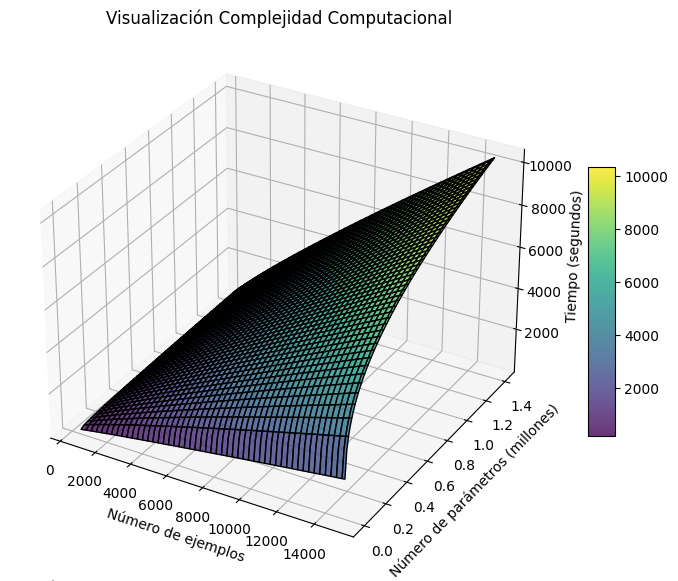

In [86]:
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Log-transform the data
df['log_time_mh'] = np.log(df['Tiempo MH'])
df['log_examples'] = np.log(df['Tamaño Dataset'])
df['log_parameters'] = np.log(df['Tamaño Modelo'])

# Prepare the feature matrix (X) and target vector (y)
X = df[['log_examples', 'log_parameters']]
y = df['log_time_mh']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients a and b
a, b = model.coef_

# Print the results
print(f"Estimated Big O complexity: O(t^{a:.2f} * p^{b:.2f})")

# Generate a grid of examples and parameters
examples_range = np.linspace(df['Tamaño Dataset'].min(), df['Tamaño Dataset'].max(), 100)
parameters_range = np.linspace(df['Tamaño Modelo'].min(), df['Tamaño Modelo'].max(), 100)
examples_grid, parameters_grid = np.meshgrid(examples_range, parameters_range)

# Compute the estimated time based on the model
a, b = model.coef_
intercept = model.intercept_
estimated_time = np.exp(intercept) * (examples_grid ** a) * (parameters_grid ** b)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surface = ax.plot_surface(
    examples_grid, 
    parameters_grid, 
    estimated_time, 
    cmap=cm.viridis, 
    edgecolor='k', 
    alpha=0.8
)

# Add labels and title
ax.set_xlabel('Número de ejemplos')
ax.set_ylabel('Número de parámetros (millones)')
ax.set_zlabel('Tiempo (segundos)')
ax.set_title('Visualización Complejidad Computacional')
fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

Estimated Big O complexity: O(t^1.05 * p^0.10)


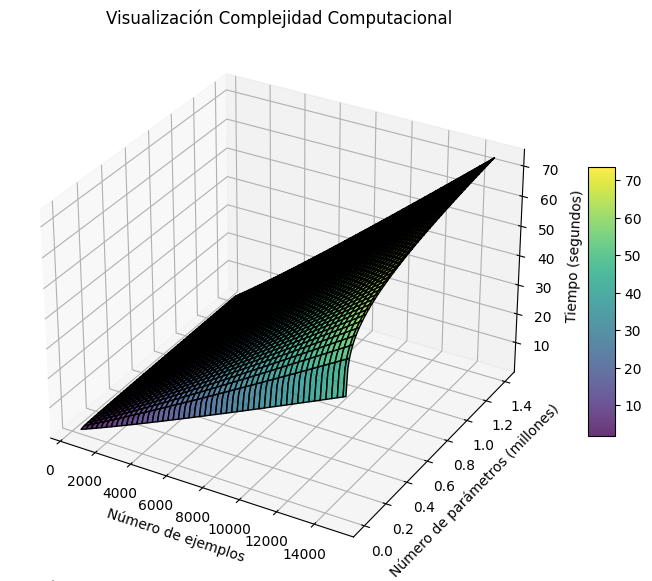

In [87]:
# Log-transform the data
df['log_time_gd'] = np.log(df['Tiempo GD'])
df['log_examples'] = np.log(df['Tamaño Dataset'])
df['log_parameters'] = np.log(df['Tamaño Modelo'])

# Prepare the feature matrix (X) and target vector (y)
X = df[['log_examples', 'log_parameters']]
y = df['log_time_gd']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients a and b
a, b = model.coef_

# Print the results
print(f"Estimated Big O complexity: O(t^{a:.2f} * p^{b:.2f})")

# Generate a grid of examples and parameters
examples_range = np.linspace(df['Tamaño Dataset'].min(), df['Tamaño Dataset'].max(), 100)
parameters_range = np.linspace(df['Tamaño Modelo'].min(), df['Tamaño Modelo'].max(), 100)
examples_grid, parameters_grid = np.meshgrid(examples_range, parameters_range)

# Compute the estimated time based on the model
a, b = model.coef_
intercept = model.intercept_
estimated_time = np.exp(intercept) * (examples_grid ** a) * (parameters_grid ** b)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surface = ax.plot_surface(
    examples_grid, 
    parameters_grid, 
    estimated_time, 
    cmap=cm.viridis, 
    edgecolor='k', 
    alpha=0.8
)

# Add labels and title
ax.set_xlabel('Número de ejemplos')
ax.set_ylabel('Número de parámetros (millones)')
ax.set_zlabel('Tiempo (segundos)')
ax.set_title('Visualización Complejidad Computacional')
fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

Estimated Big O complexity: O(t^-0.15 * p^0.18)


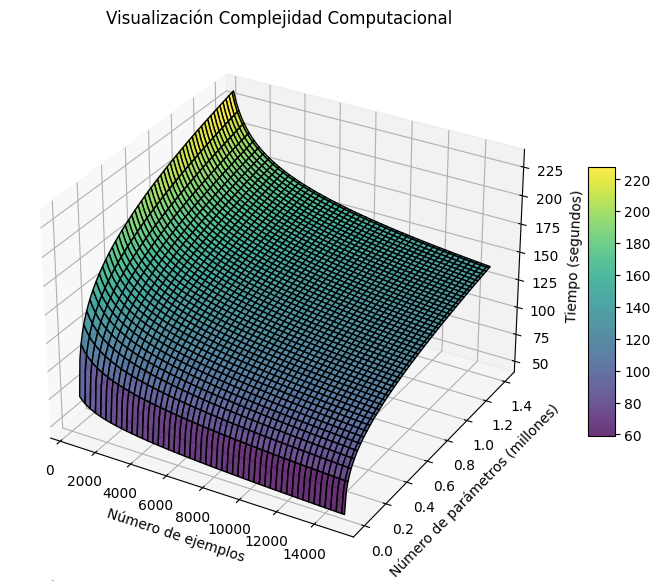

In [97]:
# Log-transform the data
df['log_prop'] = np.log(df['Proporcion'])
df['log_examples'] = np.log(df['Tamaño Dataset'])
df['log_parameters'] = np.log(df['Tamaño Modelo'])

# Prepare the feature matrix (X) and target vector (y)
X = df[['log_examples', 'log_parameters']]
y = df['log_prop']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Extract the coefficients a and b
a, b = model.coef_

# Print the results
print(f"Estimated Big O complexity: O(t^{a:.2f} * p^{b:.2f})")

# Generate a grid of examples and parameters
examples_range = np.linspace(df['Tamaño Dataset'].min(), df['Tamaño Dataset'].max(), 100)
parameters_range = np.linspace(df['Tamaño Modelo'].min(), df['Tamaño Modelo'].max(), 100)
examples_grid, parameters_grid = np.meshgrid(examples_range, parameters_range)

# Compute the estimated time based on the model
a, b = model.coef_
intercept = model.intercept_
estimated_time = np.exp(intercept) * (examples_grid ** a) * (parameters_grid ** b)

# Plot the 3D surface
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Surface plot
surface = ax.plot_surface(
    examples_grid, 
    parameters_grid, 
    estimated_time, 
    cmap=cm.viridis, 
    edgecolor='k', 
    alpha=0.8
)

# Add labels and title
ax.set_xlabel('Número de ejemplos')
ax.set_ylabel('Número de parámetros (millones)')
ax.set_zlabel('Tiempo (segundos)')
ax.set_title('Visualización Complejidad Computacional')
fig.colorbar(surface, shrink=0.5, aspect=10)

plt.show()

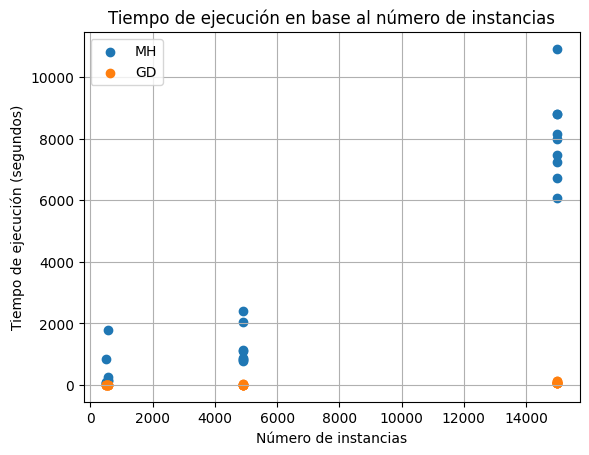

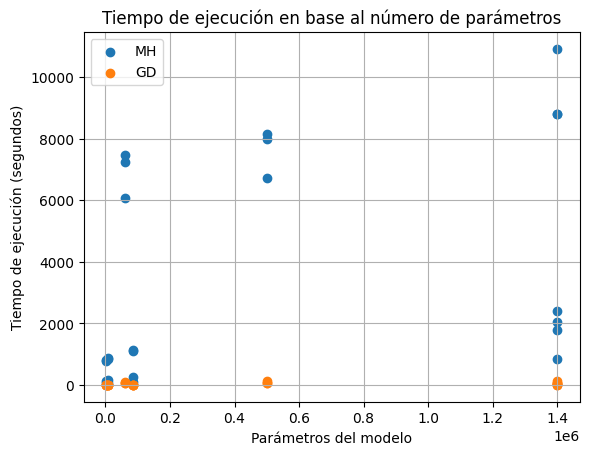

In [12]:
import matplotlib.pyplot as plt
#plt.plot(df['Tiempo MH'], label='MH')

plt.scatter(df['Tamaño Dataset'], df['Tiempo MH'], marker='o', label= "MH")
plt.scatter(df['Tamaño Dataset'], df['Tiempo GD'], marker='o', label= "GD")

plt.xlabel("Número de instancias")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución en base al número de instancias")
plt.legend()

plt.grid(True)
plt.show()


plt.scatter(df['Tamaño Modelo'], df['Tiempo MH'], marker='o', label= "MH")
plt.scatter(df['Tamaño Modelo'], df['Tiempo GD'], marker='o', label= "GD")

plt.xlabel("Parámetros del modelo")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempo de ejecución en base al número de parámetros")
plt.legend()

plt.grid(True)
plt.show()

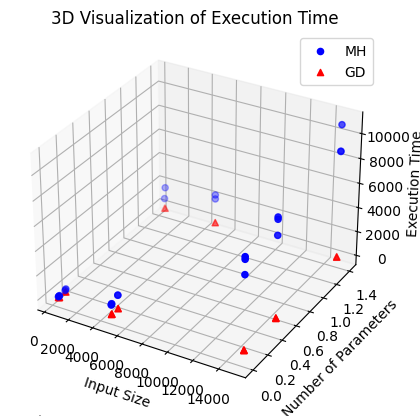

In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D


# Creating a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")

# Plotting Time 1
ax.scatter(df["Tamaño Dataset"], df["Tamaño Modelo"], df["Tiempo MH"], c="blue", label="MH", marker="o")
# Plotting Time 2
ax.scatter(df["Tamaño Dataset"], df["Tamaño Modelo"], df["Tiempo GD"], c="red", label="GD", marker="^")

# Adding labels and title
ax.set_xlabel("Input Size")
ax.set_ylabel("Number of Parameters")
ax.set_zlabel("Execution Time")
ax.set_title("3D Visualization of Execution Time")

ax.legend()

plt.show()


# Diferencias en tareas

In [4]:
import pandas as pd
from scipy import stats

# 1. Cargar los datos
df = pd.read_csv("table (1).csv")

# 2. Calcular la mejora relativa (%) de SHADE sobre ADAM
df['rel_diff'] = (df['metric_shade'] - df['metric_adam']) / df['metric_adam']

# 3. Agregar una columna que indique el tipo de tarea (clasificación o regresión)
df['task'] = df['Conjunto'].apply(lambda x: 'classification' if x in ['BCW', 'WQC'] else 'regression')

# 4. Emparejar correctamente los datos usando pivot.
# Se asume que el emparejamiento se hace por el número de capas (Columna 'Capas')
paired_data = df.pivot(index='Capas', columns='Conjunto', values='rel_diff')

display(paired_data)

# Extraer los valores emparejados según los conjuntos correspondientes:
# Para clasificación usamos BCW y WQC (se promedia) y para regresión, BHP y WQR.
classification_paired = paired_data[['BCW', 'WQC']].mean(axis=1)  # Promedio de las tareas de clasificación
regression_paired = paired_data[['BHP', 'WQR']].mean(axis=1)        # Promedio de las tareas de regresión

# Calcular el vector de diferencias (clasificación - regresión)
differences = classification_paired - regression_paired

# 5. Realizar el test de normalidad (Shapiro-Wilk) sobre las diferencias
normality_test = stats.shapiro(differences)
print("Test de normalidad (Shapiro-Wilk):")
print("W = {:.3f}, p-value = {:.3f}".format(normality_test.statistic, normality_test.pvalue))

# 6. En función del test de normalidad, elegir el test estadístico apropiado
alpha = 0.05
if normality_test.pvalue > alpha:
    # Si se cumple la normalidad, usar t-test pareado
    t_stat, p_val = stats.ttest_rel(classification_paired, regression_paired)
    print("\nDatos distribuidos normalmente. Se usa el t-test pareado:")
    print("t-statistic = {:.3f}, p-value = {:.3f}".format(t_stat, p_val))
else:
    # Emparejamiento Par 1: BCW y BHP
    df_BCW = df[df['Conjunto'] == 'BCW'][['Capas', 'rel_diff']]
    df_BHP = df[df['Conjunto'] == 'BHP'][['Capas', 'rel_diff']]
    merged_pair1 = pd.merge(df_BCW, df_BHP, on='Capas', suffixes=('_class', '_reg'))

    # Calcular la diferencia entre la mejora relativa de clasificación y la de regresión para el par 1
    merged_pair1['diff'] = merged_pair1['rel_diff_class'] - merged_pair1['rel_diff_reg']

    # Emparejamiento Par 2: WQC y WQR
    df_WQC = df[df['Conjunto'] == 'WQC'][['Capas', 'rel_diff']]
    df_WQR = df[df['Conjunto'] == 'WQR'][['Capas', 'rel_diff']]
    merged_pair2 = pd.merge(df_WQC, df_WQR, on='Capas', suffixes=('_class', '_reg'))

    # Calcular la diferencia para el par 2
    merged_pair2['diff'] = merged_pair2['rel_diff_class'] - merged_pair2['rel_diff_reg']

    # Combinar las diferencias de ambos emparejamientos
    paired_differences = pd.concat([merged_pair1['diff'], merged_pair2['diff']])

    # Aplicar el test de Wilcoxon signed-rank
    w_stat, p_val_w = stats.wilcoxon(paired_differences)
    print("\nWilcoxon signed-rank test (datos pareados):")
    print("statistic = {:.3f}, p-value = {:.3f}".format(w_stat, p_val_w))


Conjunto,BCW,BHP,WQC,WQR
Capas,,,,
1,0.010417,-0.270886,-0.538991,164.666667
2,-0.048980,-0.103365,-0.666000,-35.597222
5,-0.110000,-1.220779,-0.724422,-4166.898305
11,-0.070031,-115.189918,-0.724876,-597967.932331


Test de normalidad (Shapiro-Wilk):
W = 0.635, p-value = 0.002

Wilcoxon signed-rank test (datos pareados):
statistic = 6.000, p-value = 0.109


In [6]:
import pandas as pd
from scipy import stats

# 1. Cargar los datos
df = pd.read_csv("table (1).csv")

# 2. Calcular la mejora relativa (%) de SHADE sobre ADAM
df['rel_diff'] = (df['metric_shade'] - df['metric_adam']) / df['metric_adam']

# 3. Agregar una columna que indique el tipo de tarea (clasificación o regresión)
df['task'] = df['Conjunto'].apply(lambda x: 'classification' if x in ['BCW', 'WQC'] else 'regression')

# 4. Emparejar correctamente los datos
paired_data = df.pivot(index='Capas', columns='Conjunto', values='rel_diff')

# Extraer los valores emparejados según los conjuntos correspondientes
classification_paired = paired_data[['BCW', 'WQC']].mean(axis=1)  # Promedio de las tareas de clasificación
regression_paired = paired_data[['BHP', 'WQR']].mean(axis=1)  # Promedio de las tareas de regresión

# 5. Realizar el t-test pareado
t_stat, p_val_t = stats.ttest_rel(classification_paired, regression_paired)

# 6. Imprimir los resultados
print("T-test pareado:")
print("t-statistic = {:.3f}, p-value = {:.3f}".format(t_stat, p_val_t))



# 4. Test de Wilcoxon signed-rank para datos pareados
# Se emparejan las ejecuciones por número de capas de los datasets de dificultad similar:
#   - Par 1: BCW (clasificación) y BHP (regresión)
#   - Par 2: WQC (clasificación) y WQR (regresión)
#
# Nota: Se asume que ambos conjuntos del par tienen registros con los mismos valores en la columna 'Capas'

# Emparejamiento Par 1: BCW y BHP
df_BCW = df[df['Conjunto'] == 'BCW'][['Capas', 'rel_diff']]
df_BHP = df[df['Conjunto'] == 'BHP'][['Capas', 'rel_diff']]
merged_pair1 = pd.merge(df_BCW, df_BHP, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia entre la mejora relativa de clasificación y la de regresión para el par 1
merged_pair1['diff'] = merged_pair1['rel_diff_class'] - merged_pair1['rel_diff_reg']

# Emparejamiento Par 2: WQC y WQR
df_WQC = df[df['Conjunto'] == 'WQC'][['Capas', 'rel_diff']]
df_WQR = df[df['Conjunto'] == 'WQR'][['Capas', 'rel_diff']]
merged_pair2 = pd.merge(df_WQC, df_WQR, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia para el par 2
merged_pair2['diff'] = merged_pair2['rel_diff_class'] - merged_pair2['rel_diff_reg']

# Combinar las diferencias de ambos emparejamientos
paired_differences = pd.concat([merged_pair1['diff'], merged_pair2['diff']])

# Aplicar el test de Wilcoxon signed-rank
w_stat, p_val_w = stats.wilcoxon(paired_differences)
print("\nWilcoxon signed-rank test (datos pareados):")
print("statistic = {:.3f}, p-value = {:.3f}".format(w_stat, p_val_w))


T-test pareado:
t-statistic = 1.009, p-value = 0.387

Wilcoxon signed-rank test (datos pareados):
statistic = 6.000, p-value = 0.109


In [5]:
import pandas as pd
from scipy import stats

# 1. Cargar los datos
df = pd.read_csv("table (1).csv")

# 2. Calcular la mejora relativa (%) de SHADE sobre ADAM
df['rel_diff'] = (df['train_shade'] - df['train_adam']) / df['train_adam']

# 3. Agregar una columna que indique el tipo de tarea (clasificación o regresión)
df['task'] = df['Conjunto'].apply(lambda x: 'classification' if x in ['BCW', 'WQC'] else 'regression')

# 4. Emparejar correctamente los datos
paired_data = df.pivot(index='Capas', columns='Conjunto', values='rel_diff')

# Extraer los valores emparejados según los conjuntos correspondientes
classification_paired = paired_data[['BCW', 'WQC']].mean(axis=1)  # Promedio de las tareas de clasificación
regression_paired = paired_data[['BHP', 'WQR']].mean(axis=1)  # Promedio de las tareas de regresión

# 5. Realizar el t-test pareado
t_stat, p_val_t = stats.ttest_rel(classification_paired, regression_paired)

# 6. Imprimir los resultados
print("T-test pareado:")
print("t-statistic = {:.3f}, p-value = {:.3f}".format(t_stat, p_val_t))



# 4. Test de Wilcoxon signed-rank para datos pareados
# Se emparejan las ejecuciones por número de capas de los datasets de dificultad similar:
#   - Par 1: BCW (clasificación) y BHP (regresión)
#   - Par 2: WQC (clasificación) y WQR (regresión)
#
# Nota: Se asume que ambos conjuntos del par tienen registros con los mismos valores en la columna 'Capas'

# Emparejamiento Par 1: BCW y BHP
df_BCW = df[df['Conjunto'] == 'BCW'][['Capas', 'rel_diff']]
df_BHP = df[df['Conjunto'] == 'BHP'][['Capas', 'rel_diff']]
merged_pair1 = pd.merge(df_BCW, df_BHP, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia entre la mejora relativa de clasificación y la de regresión para el par 1
merged_pair1['diff'] = merged_pair1['rel_diff_class'] - merged_pair1['rel_diff_reg']

# Emparejamiento Par 2: WQC y WQR
df_WQC = df[df['Conjunto'] == 'WQC'][['Capas', 'rel_diff']]
df_WQR = df[df['Conjunto'] == 'WQR'][['Capas', 'rel_diff']]
merged_pair2 = pd.merge(df_WQC, df_WQR, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia para el par 2
merged_pair2['diff'] = merged_pair2['rel_diff_class'] - merged_pair2['rel_diff_reg']

# Combinar las diferencias de ambos emparejamientos
paired_differences = pd.concat([merged_pair1['diff'], merged_pair2['diff']])

# Aplicar el test de Wilcoxon signed-rank
w_stat, p_val_w = stats.wilcoxon(paired_differences)
print("\nWilcoxon signed-rank test (datos pareados):")
print("statistic = {:.3f}, p-value = {:.3f}".format(w_stat, p_val_w))


T-test pareado:
t-statistic = 0.250, p-value = 0.819

Wilcoxon signed-rank test (datos pareados):
statistic = 16.000, p-value = 0.844


In [4]:
import pandas as pd
from scipy import stats

# 1. Cargar los datos
df = pd.read_csv("table (1).csv")

# 2. Calcular la mejora relativa (%) de SHADE sobre ADAM
df['rel_diff'] = ((df['test_shade'] - df['train_shade']) - (df['test_adam'] - df['train_adam'])) / (df['test_adam'] - df['train_adam'])

# 3. Agregar una columna que indique el tipo de tarea (clasificación o regresión)
df['task'] = df['Conjunto'].apply(lambda x: 'classification' if x in ['BCW', 'WQC'] else 'regression')

# 4. Emparejar correctamente los datos
paired_data = df.pivot(index='Capas', columns='Conjunto', values='rel_diff')

# Extraer los valores emparejados según los conjuntos correspondientes
classification_paired = paired_data[['BCW', 'WQC']].mean(axis=1)  # Promedio de las tareas de clasificación
regression_paired = paired_data[['BHP', 'WQR']].mean(axis=1)  # Promedio de las tareas de regresión

# 5. Realizar el t-test pareado
t_stat, p_val_t = stats.ttest_rel(classification_paired, regression_paired)

# 6. Imprimir los resultados
print("T-test pareado:")
print("t-statistic = {:.3f}, p-value = {:.3f}".format(t_stat, p_val_t))



# 4. Test de Wilcoxon signed-rank para datos pareados
# Se emparejan las ejecuciones por número de capas de los datasets de dificultad similar:
#   - Par 1: BCW (clasificación) y BHP (regresión)
#   - Par 2: WQC (clasificación) y WQR (regresión)
#
# Nota: Se asume que ambos conjuntos del par tienen registros con los mismos valores en la columna 'Capas'

# Emparejamiento Par 1: BCW y BHP
df_BCW = df[df['Conjunto'] == 'BCW'][['Capas', 'rel_diff']]
df_BHP = df[df['Conjunto'] == 'BHP'][['Capas', 'rel_diff']]
merged_pair1 = pd.merge(df_BCW, df_BHP, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia entre la mejora relativa de clasificación y la de regresión para el par 1
merged_pair1['diff'] = merged_pair1['rel_diff_class'] - merged_pair1['rel_diff_reg']

# Emparejamiento Par 2: WQC y WQR
df_WQC = df[df['Conjunto'] == 'WQC'][['Capas', 'rel_diff']]
df_WQR = df[df['Conjunto'] == 'WQR'][['Capas', 'rel_diff']]
merged_pair2 = pd.merge(df_WQC, df_WQR, on='Capas', suffixes=('_class', '_reg'))

# Calcular la diferencia para el par 2
merged_pair2['diff'] = merged_pair2['rel_diff_class'] - merged_pair2['rel_diff_reg']

# Combinar las diferencias de ambos emparejamientos
paired_differences = pd.concat([merged_pair1['diff'], merged_pair2['diff']])

# Aplicar el test de Wilcoxon signed-rank
w_stat, p_val_w = stats.wilcoxon(paired_differences)
print("\nWilcoxon signed-rank test (datos pareados):")
print("statistic = {:.3f}, p-value = {:.3f}".format(w_stat, p_val_w))


T-test pareado:
t-statistic = -1.652, p-value = 0.197

Wilcoxon signed-rank test (datos pareados):
statistic = 2.000, p-value = 0.023


In [27]:
import pandas as pd
import statsmodels.api as sm


# Crear la variable categórica 'task'
df["task"] = df["Conjunto"].apply(lambda x: "classification" if x in ["BCW", "WQC"] else "regression")

# Calcular la mejora relativa (%) de SHADE sobre ADAM
df["rel_diff"] = (df["metric_shade"] - df["metric_adam"]) / df["metric_adam"] * 100

# Codificar 'task' como una variable numérica (0 = clasificación, 1 = regresión)
df["task_numeric"] = df["task"].map({"classification": 0, "regression": 1})

# Definir variables para el modelo
X = sm.add_constant(df["task_numeric"])  # Agregar constante para la intersección
y = df["rel_diff"]

# Ajustar el modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Mostrar el resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:               rel_diff   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.016
Date:                Mon, 10 Feb 2025   Prob (F-statistic):              0.331
Time:                        12:44:07   Log-Likelihood:                -285.94
No. Observations:                  16   AIC:                             575.9
Df Residuals:                      14   BIC:                             577.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -35.9110   5.28e+06   -6.8e-06   

/usr/local/lib/python3.11/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [22]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [23]:
import numpy as np
import pandas as pd
from scipy.stats import ttest_ind, mannwhitneyu

path = '/notebooks/table (1).csv'
# Data
df = pd.read_csv(path)
display(df)
df.rename(columns={'RMSPROP':'RMSPROP_E', 'Unnamed: 3':'RMSPROP_T', 'Unnamed: 4':'RMSPROP_M', 'SHADE-ILS':'SHADE_ILS_E', 'SHADE-ILS':'SHADE_ILS_E', 'Unnamed: 6':'SHADE_ILS_T', 'Unnamed: 7':'SHADE_ILS_M'}, inplace=True)
df = df.drop(index=0)
display(df)

,Conjunto,Capas,train_adam,test_adam,metric_adam,train_shade,test_shade,metric_shade
0,BCW,1,0.190,0.108,0.960,0.073,0.142,0.970
1,BCW,2,0.140,0.041,0.980,0.063,0.350,0.932
2,BCW,5,0.115,0.026,1.000,0.055,0.475,0.890
3,BCW,11,0.112,0.094,0.971,0.098,0.491,0.903
4,WQC,1,0.970,2.172,0.436,1.098,1.235,0.201
5,WQC,2,0.873,3.177,0.500,1.078,1.340,0.167
6,WQC,5,0.770,3.833,0.606,0.963,1.405,0.167
7,WQC,11,0.940,3.873,0.607,1.137,1.509,0.167
8,WQR,1,0.475,0.972,-0.012,0.611,0.970,-1.988
9,WQR,2,0.430,1.126,0.072,0.551,0.826,-2.491


,Conjunto,Capas,train_adam,test_adam,metric_adam,train_shade,test_shade,metric_shade
1,BCW,2,0.140,0.041,0.980,0.063,0.350,0.932
2,BCW,5,0.115,0.026,1.000,0.055,0.475,0.890
3,BCW,11,0.112,0.094,0.971,0.098,0.491,0.903
4,WQC,1,0.970,2.172,0.436,1.098,1.235,0.201
5,WQC,2,0.873,3.177,0.500,1.078,1.340,0.167
6,WQC,5,0.770,3.833,0.606,0.963,1.405,0.167
7,WQC,11,0.940,3.873,0.607,1.137,1.509,0.167
8,WQR,1,0.475,0.972,-0.012,0.611,0.970,-1.988
9,WQR,2,0.430,1.126,0.072,0.551,0.826,-2.491
10,WQR,5,0.390,1.180,0.236,0.589,0.724,-983.152


In [56]:
df['SHADE_ILS_M'] = df['SHADE_ILS_M'].astype(float)
df['RMSPROP_M'] = df['RMSPROP_M'].astype(float)
df['SHADE_ILS_E'] = df['SHADE_ILS_E'].astype(float)
df['RMSPROP_E'] = df['RMSPROP_E'].astype(float)
df['SHADE_ILS_T'] = df['SHADE_ILS_T'].astype(float)
df['RMSPROP_T'] = df['RMSPROP_T'].astype(float)

df.loc[df['SHADE_ILS_M'] < -1, 'SHADE_ILS_M' ] = -1
df.loc[df['RMSPROP_M'] < -1, 'RMSPROP_M' ] = -1
display(df)

df.loc[df['Conjunto'] == 'BCW', 'SHADE_ILS_M'] = (df['SHADE_ILS_M']- 0.5)/(1-0.5)
df.loc[df['Conjunto'] == 'WQC', 'SHADE_ILS_M'] = (df['SHADE_ILS_M']- 0.2)/(1-0.2)
display(df)

,Conjunto,Capas,RMSPROP_E,RMSPROP_T,RMSPROP_M,SHADE_ILS_E,SHADE_ILS_T,SHADE_ILS_M
1,BCW,1.0,0.142,0.060,0.971,0.073,0.142,0.970
2,BCW,2.0,0.157,0.031,0.990,0.063,0.350,0.932
3,BCW,5.0,0.074,0.019,1.000,0.055,0.475,0.890
4,BCW,11.0,0.133,0.047,0.981,0.098,0.491,0.903
5,WQC,1.0,0.970,0.901,0.362,1.050,1.059,0.230
6,WQC,2.0,0.873,0.838,0.386,1.055,1.115,0.203
7,WQC,5.0,0.770,0.782,0.441,0.933,1.073,0.236
8,WQC,11.0,0.940,0.874,0.360,0.967,1.115,0.201
9,WQR,1.0,0.440,0.373,-0.574,0.489,0.532,-1.000
10,WQR,2.0,0.406,0.352,-0.263,0.471,0.536,-1.000


,Conjunto,Capas,RMSPROP_E,RMSPROP_T,RMSPROP_M,SHADE_ILS_E,SHADE_ILS_T,SHADE_ILS_M
1,BCW,1.0,0.142,0.060,0.971,0.073,0.142,0.94000
2,BCW,2.0,0.157,0.031,0.990,0.063,0.350,0.86400
3,BCW,5.0,0.074,0.019,1.000,0.055,0.475,0.78000
4,BCW,11.0,0.133,0.047,0.981,0.098,0.491,0.80600
5,WQC,1.0,0.970,0.901,0.362,1.050,1.059,0.03750
6,WQC,2.0,0.873,0.838,0.386,1.055,1.115,0.00375
7,WQC,5.0,0.770,0.782,0.441,0.933,1.073,0.04500
8,WQC,11.0,0.940,0.874,0.360,0.967,1.115,0.00125
9,WQR,1.0,0.440,0.373,-0.574,0.489,0.532,-1.00000
10,WQR,2.0,0.406,0.352,-0.263,0.471,0.536,-1.00000


In [57]:
# Separate into classification and regression groups
classification = df[df['Conjunto'].isin(['BCW', 'WQC'])]
regression = df[df['Conjunto'].isin(['WQR', 'BHP'])]

# Summary statistics
summary = {
    'Group': ['Classification', 'Classification', 'Classification', 'Regression', 'Regression', 'Regression'],
    'Metric': ['E', 'T', 'M', 'E', 'T', 'M'],
    'Mean': [
        classification['SHADE_ILS_E'].mean(), classification['SHADE_ILS_T'].mean(), classification['SHADE_ILS_M'].mean(),
        regression['SHADE_ILS_E'].mean(), regression['SHADE_ILS_T'].mean(), regression['SHADE_ILS_M'].mean()
    ],
    'StdDev': [
        classification['SHADE_ILS_E'].std(), classification['SHADE_ILS_T'].std(), classification['SHADE_ILS_M'].std(),
        regression['SHADE_ILS_E'].std(), regression['SHADE_ILS_T'].std(), regression['SHADE_ILS_M'].std()
    ]
}

summary_df = pd.DataFrame(summary)
print("Summary Statistics:\n", summary_df)

# Hypothesis testing
metrics = ['SHADE_ILS_E', 'SHADE_ILS_T', 'SHADE_ILS_M']

test_results = []
for metric in metrics:
    t_stat, p_value = ttest_ind(classification[metric], regression[metric], equal_var=False)
    u_stat, p_value_u = mannwhitneyu(classification[metric], regression[metric])
    test_results.append({
        'Metric': metric,
        'T-Statistic': t_stat,
        'T-Test p-value': p_value,
        'U-Statistic': u_stat,
        'Mann-Whitney p-value': p_value_u
    })


test_results_df = pd.DataFrame(test_results)
print("Hypothesis Testing Results:\n", test_results_df)

# Effect size calculation (Cohen's d)
def cohen_d(x, y):
    # Calculate the size of each sample
    n_x = len(x)
    n_y = len(y)
    # Calculate the variance of each sample
    var_x = x.var(ddof=1)
    var_y = y.var(ddof=1)
    # Calculate the pooled standard deviation
    pooled_std = np.sqrt(((n_x - 1) * var_x + (n_y - 1) * var_y) / (n_x + n_y - 2))
    # Calculate the means of each sample
    mean_x = x.mean()
    mean_y = y.mean()
    # Calculate Cohen's d
    d = (mean_x - mean_y) / pooled_std
    return d

effect_sizes = []
for metric in metrics:
    d = cohen_d(classification[metric], regression[metric])
    effect_sizes.append({
        'Metric': metric,
        'Effect Size (Cohen\'s d)': d
    })

effect_sizes_df = pd.DataFrame(effect_sizes)
print("Effect Sizes:\n", effect_sizes_df)

Summary Statistics:
             Group Metric      Mean     StdDev
0  Classification      E  0.536750   0.498315
1  Classification      T  0.727500   0.402595
2  Classification      M  0.434688   0.444000
3      Regression      E  9.787625  14.523190
4      Regression      T  6.985125   9.406646
5      Regression      M -0.483125   0.761200
Hypothesis Testing Results:
         Metric  T-Statistic  T-Test p-value  U-Statistic  Mann-Whitney p-value
0  SHADE_ILS_E    -1.800571        0.114689         16.0              0.104895
1  SHADE_ILS_T    -1.879846        0.102036         16.0              0.103308
2  SHADE_ILS_M     2.945851        0.012998         56.0              0.012241
Effect Sizes:
         Metric  Effect Size (Cohen's d)
0  SHADE_ILS_E                -0.900286
1  SHADE_ILS_T                -0.939923
2  SHADE_ILS_M                 1.472926


In [44]:
classification = df[df['Conjunto'].isin(['BCW', 'WQC'])]
regression = df[df['Conjunto'].isin(['WQR', 'BHP'])]
display(classification)

classification_merged= classification.loc[:,['Conjunto', 'Capas']]
classification_merged['train'] = classification.loc[:,'SHADE_ILS_E'] - classification.loc[:,'RMSPROP_E']
classification_merged['test'] = classification.loc[:,'SHADE_ILS_T'] - classification.loc[:,'RMSPROP_T']
classification_merged['metric'] = classification.loc[:,'SHADE_ILS_M'] - classification.loc[:,'RMSPROP_M']

regression_merged= regression.loc[:,['Conjunto', 'Capas']]
regression_merged['train'] = regression.loc[:,'SHADE_ILS_E'] - regression.loc[:,'RMSPROP_E']
regression_merged['test'] = regression.loc[:,'SHADE_ILS_T'] - regression.loc[:,'RMSPROP_T']
regression_merged['metric'] = regression.loc[:,'SHADE_ILS_M'] - regression.loc[:,'RMSPROP_M']

,Conjunto,Capas,RMSPROP_E,RMSPROP_T,RMSPROP_M,SHADE_ILS_E,SHADE_ILS_T,SHADE_ILS_M
1,BCW,1.0,0.142,0.060,0.971,0.073,0.142,0.970
2,BCW,2.0,0.157,0.031,0.990,0.063,0.350,0.932
3,BCW,5.0,0.074,0.019,1.000,0.055,0.475,0.890
4,BCW,11.0,0.133,0.047,0.981,0.098,0.491,0.903
5,WQC,1.0,0.970,0.901,0.362,1.050,1.059,0.230
6,WQC,2.0,0.873,0.838,0.386,1.055,1.115,0.203
7,WQC,5.0,0.770,0.782,0.441,0.933,1.073,0.236
8,WQC,11.0,0.940,0.874,0.360,0.967,1.115,0.201


In [45]:
display(regression_merged)

,Conjunto,Capas,train,test,metric
9,WQR,1.0,0.049,0.159,-0.426
10,WQR,2.0,0.065,0.184,-0.737
11,WQR,5.0,0.085,0.295,-0.903
12,WQR,11.0,0.023,0.246,0.000
13,BHP,1.0,-74.381,1.217,-0.214
14,BHP,2.0,-45.723,0.071,-0.086
15,BHP,5.0,-81.046,11.044,-1.034
16,BHP,11.0,-11.357,23.526,-1.853


In [ ]:
num_clas= {'BCW':2, 'WQ':6, 'MNIST':10, 'FMNIST':10, 'CIFAR':10}

df['Scaled_Accuracy'] = df_gd.apply(
    lambda row: (row['Accuracy'] - 1 / num_clas[row['Dataset']]) / (1 - 1 / num_clas[row['Dataset']]), 
    axis=1
)

# P3. Task complexity vs model complexity vs dataset size

In [52]:
# Sample DataFrame
data = {
    'task_complexity': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3],
    'dataset_size': [3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'model_complexity': [3, 4, 5, 1, 2, 3, 5, 1, 2, 3, 5, 3, 4, 5, 3, 4, 5],
    'performance': [0.11, 0, 0, 0.875, 0.76, 0.59, 0.25, 0.145, 0.138, 0.138, 0.11, 0.264, 0, 0, 0.016, 0, 0]
}
df = pd.DataFrame(data)


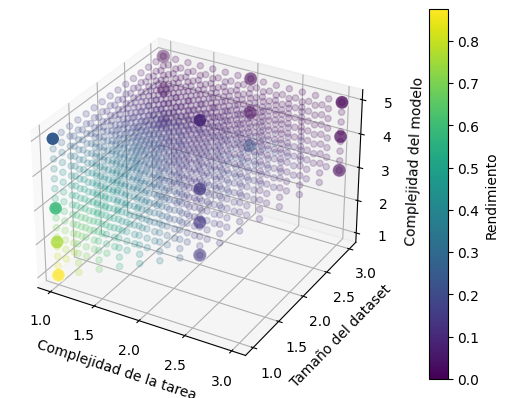

In [61]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import numpy as np
from scipy.interpolate import griddata


# Define grid for interpolation
grid_x, grid_y, grid_z = np.mgrid[
    1:3:15j, 
    1:3:15j, 
    1:5:15j]

# Interpolate performance values
grid_performance = griddata(
    (df['task_complexity'], df['dataset_size'], df['model_complexity']), 
    df['performance'], 
    (grid_x, grid_y, grid_z), 
    method='linear')

# Plot interpolated surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
valid_idx = np.isfinite(grid_performance)

# Use scatter plot for original data points
scatter = ax.scatter(df['task_complexity'], df['dataset_size'], df['model_complexity'], c=df['performance'], s=100, cmap='viridis',edgecolors='w')

# Plot interpolated surface
#ax.plot_surface(grid_x[:,:,0], grid_y[:,:,0], grid_z[:,:,0], facecolors=plt.cm.viridis(grid_performance[:,:,0]), rstride=1, cstride=1, linewidth=0, antialiased=False, alpha=0.5)
ax.scatter(grid_x[valid_idx], grid_y[valid_idx], grid_z[valid_idx], c=grid_performance[valid_idx], cmap='viridis', alpha=0.2)
#ax.plot_surface(grid_performance[0], grid_performance[1], grid_performance[2],  rstride=1, cstride=1,cmap="autumn")
# Add color bar
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Rendimiento')

ax.set_xlabel('Complejidad de la tarea')
ax.set_ylabel('Tamaño del dataset')
ax.set_zlabel('Complejidad del modelo')
plt.show()


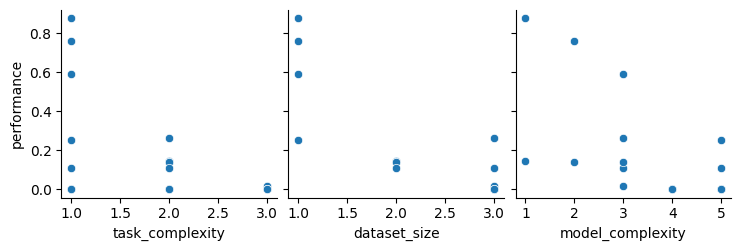

In [42]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create DataFrame from your data
data = {
    'task_complexity': [1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3],
    'dataset_size': [3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3],
    'model_complexity': [3, 4, 5, 1, 2, 3, 5, 1, 2, 3, 5, 3, 4, 5, 3, 4, 5],
    'performance': [0.11, 0, 0, 0.875, 0.76, 0.59, 0.25, 0.145, 0.138, 0.138, 0.11, 0.264, 0, 0, 0.016, 0, 0]
}
df = pd.DataFrame(data)

# Pairplot
sns.pairplot(df, x_vars=['task_complexity', 'dataset_size', 'model_complexity'], y_vars='performance', kind='scatter')
plt.show()


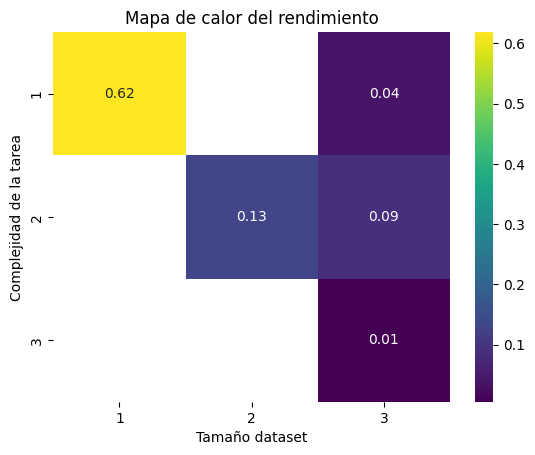

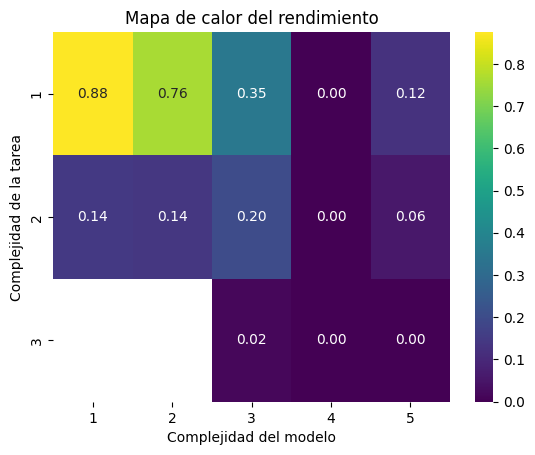

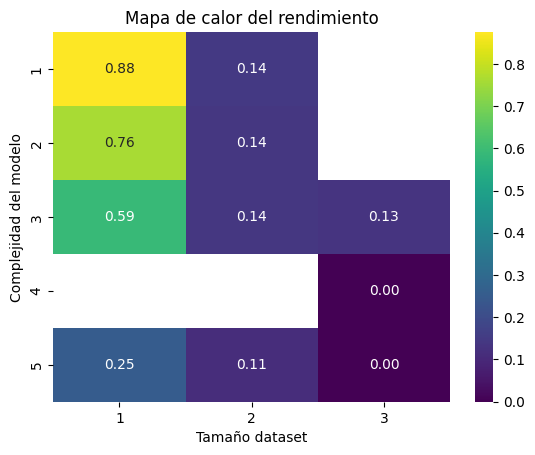

In [60]:
# Create a pivot table for heatmap
pivot_table = df.pivot_table(values='performance', index='task_complexity', columns='dataset_size', aggfunc='mean')

sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f")
plt.xlabel('Tamaño dataset')
plt.ylabel('Complejidad de la tarea')
plt.title('Mapa de calor del rendimiento')
plt.show()

pivot_table = df.pivot_table(values='performance', index='task_complexity', columns='model_complexity', aggfunc='mean')

sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f")
plt.xlabel('Complejidad del modelo')
plt.ylabel('Complejidad de la tarea')
plt.title('Mapa de calor del rendimiento')
plt.show()


pivot_table = df.pivot_table(values='performance', index='model_complexity', columns='dataset_size', aggfunc='mean')

sns.heatmap(pivot_table, cmap='viridis', annot=True, fmt=".2f")
plt.xlabel('Tamaño dataset')
plt.ylabel('Complejidad del modelo')
plt.title('Mapa de calor del rendimiento')
plt.show()

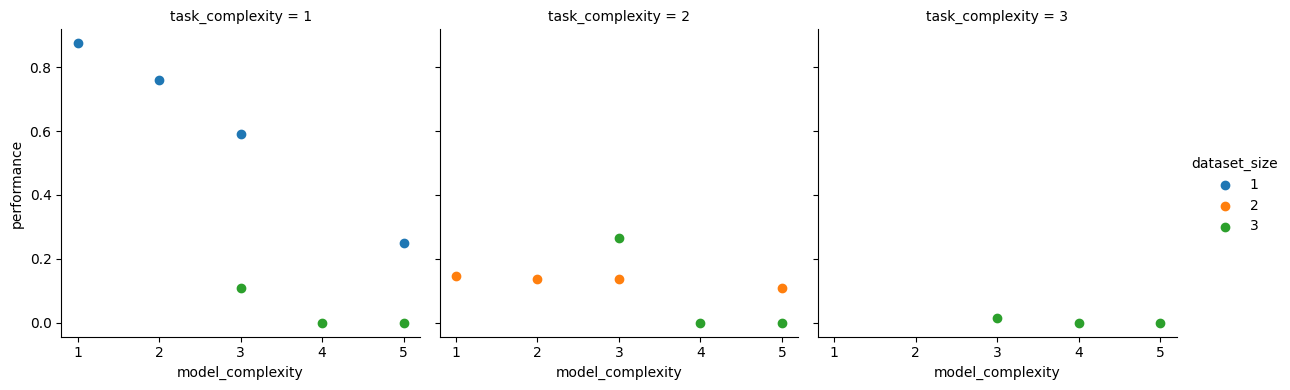

In [43]:
g = sns.FacetGrid(df, col='task_complexity', hue='dataset_size', height=4, aspect=1)
g.map(plt.scatter, 'model_complexity', 'performance')
g.add_legend()
plt.show()


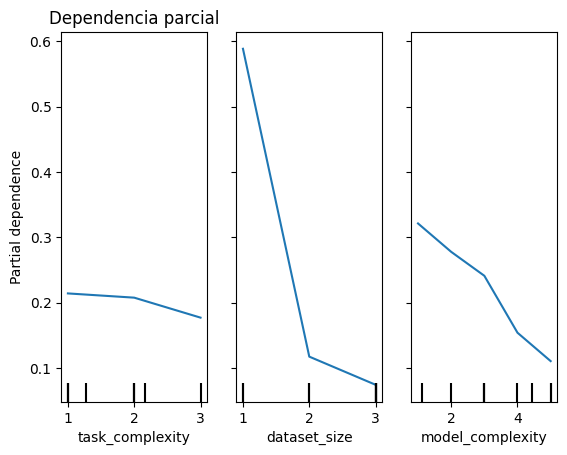

In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Fit a random forest model
X = df[['task_complexity', 'dataset_size', 'model_complexity']]
y = df['performance']
model = RandomForestRegressor(random_state=42).fit(X, y)

# Custom feature names
feature_names = ['Task Complexity', 'Dataset Size', 'Model Complexity']

# Create partial dependence plots with custom titles and feature names
features = ['task_complexity', 'dataset_size', 'model_complexity']
disp = PartialDependenceDisplay.from_estimator(model, X, features)

# Set a custom title for the plot
disp.axes_[0, 0].set_title("Dependencia parcial")
plt.show()


# Recovering training values

In [5]:
import pickle
import numpy as np
learners={}

optims= ['ADAM', 'NAG', 'RMSProp']
datasets = ['wqr', 'wqc', 'bcw', 'bhp', 'CIFAR', 'MNIST', 'FMNIST']
for dataset in datasets:
    learners[dataset]={}
    for optim in optims:
        learners[dataset][optim]={}

        if dataset=='wqr' or dataset=='wqc' or dataset=='bcw' or dataset=='bhp':
            models=[1,2,5,11]
        else:
            models=['LeNet5', 'ResNet15', 'ResNet57']
        for model in models:
            file_path = f'/notebooks/saved_models/learner_{dataset}_{model}_{optim}.pkl'
            with open(file_path, 'rb') as f:
                data = pickle.load(f)
            learners[dataset][optim][model], learners[dataset][optim][model].recorder.values = data['learner'], data['recorder_values']
            train_err = [row[0] for row in learners[dataset][optim][model].recorder.values]
            val_err = [row[1] for row in learners[dataset][optim][model].recorder.values]
            min_ind = np.argmin(val_err)
            print(f'Para el dataset {dataset} entrenando modelo {model} con el optim {optim}. El error de entrenamiento es {train_err[min_ind]} y el de validación {val_err[min_ind]}')
       

Para el dataset wqr entrenando modelo 1 con el optim ADAM. El error de entrenamiento es 0.43450257182121277 y el de validación 0.4396035671234131
Para el dataset wqr entrenando modelo 2 con el optim ADAM. El error de entrenamiento es 0.38998478651046753 y el de validación 0.37307125329971313
Para el dataset wqr entrenando modelo 5 con el optim ADAM. El error de entrenamiento es 0.31733784079551697 y el de validación 0.25967544317245483
Para el dataset wqr entrenando modelo 11 con el optim ADAM. El error de entrenamiento es 0.34242013096809387 y el de validación 0.3148428201675415
Para el dataset wqr entrenando modelo 1 con el optim NAG. El error de entrenamiento es 0.5364865064620972 y el de validación 0.5106427073478699
Para el dataset wqr entrenando modelo 2 con el optim NAG. El error de entrenamiento es 0.5009714365005493 y el de validación 0.4661933481693268
Para el dataset wqr entrenando modelo 5 con el optim NAG. El error de entrenamiento es 0.447249174118042 y el de validación 0

# P2. Clas vs Reg

In [1]:
mhs = ['SHADE', 'SHADE-GD', 'SHADE-ILS', 'SHADE-ILS-GD']
gd = ['NAG', 'RMSPROP', 'ADAM']

results = [
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 1, 'mh': 'None', 'gd': 'NAG', 'train_err': 0.16, 'gen_err': 0.11, 'metric': 0.95, 'time': 2.5},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 2, 'mh': 'None', 'gd': 'NAG', 'train_err': 0.17, 'gen_err': 0.08, 'metric': 0.97, 'time': 2.5},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 5, 'mh': 'None', 'gd': 'NAG', 'train_err': 0.13, 'gen_err': 0.06, 'metric': 1.0, 'time': 2.6},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 11, 'mh': 'None', 'gd': 'NAG', 'train_err': 0.21, 'gen_err': 0.08, 'metric': 0.96, 'time': 3.1},
    
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 1, 'mh': 'None', 'gd': 'RMSPROP', 'train_err': 0.14, 'gen_err': 0.05, 'metric': 0.97, 'time': 2.4},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 2, 'mh': 'None', 'gd': 'RMSPROP', 'train_err': 0.15, 'gen_err': 0.03, 'metric': 0.99, 'time': 2.4},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 5, 'mh': 'None', 'gd': 'RMSPROP', 'train_err': 0.07, 'gen_err': 0.01, 'metric': 1.0, 'time': 2.6},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 11, 'mh': 'None', 'gd': 'RMSPROP', 'train_err': 0.13, 'gen_err': 0.04, 'metric': 0.98, 'time': 3.1},
    
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 1, 'mh': 'None', 'gd': 'ADAM', 'train_err': 0.18, 'gen_err': 0.10, 'metric': 0.96, 'time': 2.4},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 2, 'mh': 'None', 'gd': 'ADAM', 'train_err': 0.14, 'gen_err': 0.04, 'metric': 0.98, 'time': 2.4},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 5, 'mh': 'None', 'gd': 'ADAM', 'train_err': 0.10, 'gen_err': 0.02, 'metric': 1.0, 'time': 2.9},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 11, 'mh': 'None', 'gd': 'ADAM', 'train_err': 1.13, 'gen_err': 0.06, 'metric': 0.95, 'time': 3.0},
    
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 1, 'mh': 'SHADE', 'gd': 'None', 'train_err': 0.10, 'gen_err': 0.18, 'metric': 0.93, 'time': 126},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 2, 'mh': 'SHADE', 'gd': 'None', 'train_err': 0.21, 'gen_err': 0.49, 'metric': 0.72, 'time': 135},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 5, 'mh': 'SHADE', 'gd': 'None', 'train_err': 0.63, 'gen_err': 0.64, 'metric': 0.82, 'time': 214},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 11, 'mh': 'SHADE', 'gd': 'None', 'train_err': 0.70, 'gen_err': 0.69, 'metric': 0.5, 'time': 1265},
    
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 1, 'mh': 'SHADE-ILS', 'gd': 'None', 'train_err': 0.07, 'gen_err': 0.14, 'metric': 0.97, 'time': 135},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 2, 'mh': 'SHADE-ILS', 'gd': 'None', 'train_err': 0.06, 'gen_err': 0.35, 'metric': 0.93, 'time': 147},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 5, 'mh': 'SHADE-ILS', 'gd': 'None', 'train_err': 0.05, 'gen_err': 0.47, 'metric': 0.89, 'time': 251},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 11, 'mh': 'SHADE-ILS', 'gd': 'None', 'train_err': 0.09, 'gen_err': 0.49, 'metric': 0.9, 'time': 1789},
    
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 1, 'mh': 'SHADE-GD', 'gd': 'None', 'train_err': 0.10, 'gen_err': 0.18, 'metric': 0.91, 'time': 200},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 2, 'mh': 'SHADE-GD', 'gd': 'None', 'train_err': 0.11, 'gen_err': 0.22, 'metric': 0.95, 'time': 220},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 5, 'mh': 'SHADE-GD', 'gd': 'None', 'train_err': 0.10, 'gen_err': 0.45, 'metric': 0.87, 'time': 315},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 11, 'mh': 'SHADE-GD', 'gd': 'None', 'train_err': 0.27, 'gen_err': 0.65, 'metric': 0.6, 'time': 1779},
    
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 1, 'mh': 'SHADE-ILS-GD', 'gd': 'None', 'train_err': 0.06, 'gen_err': 0.15, 'metric': 0.94, 'time': 210},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 2, 'mh': 'SHADE-ILS-GD', 'gd': 'None', 'train_err': 0.06, 'gen_err': 0.35, 'metric': 0.93, 'time': 224},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 5, 'mh': 'SHADE-ILS-GD', 'gd': 'None', 'train_err': 0.03, 'gen_err': 0.61, 'metric': 0.6, 'time': 368},
    {'Task': 'clas', 'Dataset': 'bcw', 'n_layer': 11, 'mh': 'SHADE-ILS-GD', 'gd': 'None', 'train_err': 0.11, 'gen_err': 0.7, 'metric': 0.5, 'time': 2171}
]




results_wqc = [
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 1,
        'gd': None,
        'mh': 'NAG',
        'E': 0.99,
        'T': 0.92,
        'A': 0.34,
        'time': 9.47
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 2,
        'gd': None,
        'mh': 'NAG',
        'E': 0.96,
        'T': 0.90,
        'A': 0.37,
        'time': 10.24
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 5,
        'gd': None,
        'mh': 'NAG',
        'E': 0.71,
        'T': 0.71,
        'A': 0.52,
        'time': 12.58
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 11,
        'gd': None,
        'mh': 'NAG',
        'E': 0.66,
        'T': 0.65,
        'A': 0.55,
        'time': 15.45
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 1,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 0.97,
        'T': 0.90,
        'A': 0.36,
        'time': 9.69
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 2,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 0.87,
        'T': 0.83,
        'A': 0.38,
        'time': 10.06
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 5,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 0.77,
        'T': 0.78,
        'A': 0.44,
        'time': 12.28
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 11,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 0.93,
        'T': 0.87,
        'A': 0.35,
        'time': 17.92
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 1,
        'gd': None,
        'mh': 'ADAM',
        'E': 0.97,
        'T': 0.90,
        'A': 0.35,
        'time': 9.88
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 2,
        'gd': None,
        'mh': 'ADAM',
        'E': 0.88,
        'T': 0.85,
        'A': 0.38,
        'time': 10.76
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 5,
        'gd': None,
        'mh': 'ADAM',
        'E': 0.62,
        'T': 0.65,
        'A': 0.56,
        'time': 12.67
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 11,
        'gd': None,
        'mh': 'ADAM',
        'E': 0.70,
        'T': 0.69,
        'A': 0.57,
        'time': 17.31
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 1,
        'gd': 'SHADE',
        'mh': None,
        'E': 2.08,
        'T': 2.16,
        'A': 0.30,
        'time': 708.60
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 2,
        'gd': 'SHADE',
        'mh': None,
        'E': 2.12,
        'T': 2.55,
        'A': 0.21,
        'time': 770.07
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 5,
        'gd': 'SHADE',
        'mh': None,
        'E': 2.58,
        'T': 2.30,
        'A': 0.15,
        'time': 969.46
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 11,
        'gd': 'SHADE',
        'mh': None,
        'E': 2.51,
        'T': 2.30,
        'A': 0.20,
        'time': 1941.44
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 1,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 1.04,
        'T': 1.05,
        'A': 0.22,
        'time': 798.46
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 2,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 1.05,
        'T': 1.11,
        'A': 0.20,
        'time': 864.93
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 5,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 0.93,
        'T': 1.07,
        'A': 0.23,
        'time': 1108.06
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 11,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 0.96,
        'T': 1.14,
        'A': 0.20,
        'time': 2390.91
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 1,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 0.98,
        'T': 1.11,
        'A': 0.20,
        'time': 800.24
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 2,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 0.91,
        'T': 1.09,
        'A': 0.20,
        'time': 854.46
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 5,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 0.99,
        'T': 1.00,
        'A': 0.25,
        'time': 1096.99
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 11,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 1.01,
        'T': 1.24,
        'A': 0.20,
        'time': 2096.57
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 1,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 1.03,
        'T': 1.09,
        'A': 0.20,
        'time': 799.41
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 2,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 0.99,
        'T': 1.04,
        'A': 0.29,
        'time': 867.99
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 5,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 0.96,
        'T': 1.05,
        'A': 0.27,
        'time': 1098.78
    },
    {
        'type': 'clas',
        'dataset': 'wqc',
        'layers': 11,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 0.48,
        'T': 1.37,
        'A': 0.20,
        'time': 2247.98
    }
]


results_bhp = [
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 1,
        'gd': None,
        'mh': 'NAG',
        'E': 127.12,
        'T': 6.49,
        'R2': 0.79,
        'time': 1.05
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 2,
        'gd': None,
        'mh': 'NAG',
        'E': 132.71,
        'T': 4.37,
        'R2': 0.84,
        'time': 1.02
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 5,
        'gd': None,
        'mh': 'NAG',
        'E': 102.09,
        'T': 3.17,
        'R2': 0.86,
        'time': 1.20
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 11,
        'gd': None,
        'mh': 'NAG',
        'E': 152.89,
        'T': 5.07,
        'R2': 0.79,
        'time': 1.80
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 1,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 61.71,
        'T': 4.67,
        'R2': 0.82,
        'time': 1.00
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 2,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 56.05,
        'T': 4.38,
        'R2': 0.84,
        'time': 1.00
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 5,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 59.62,
        'T': 3.31,
        'R2': 0.84,
        'time': 1.10
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 11,
        'gd': None,
        'mh': 'RMSPROP',
        'E': 57.15,
        'T': 4.02,
        'R2': 0.81,
        'time': 1.30
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 1,
        'gd': None,
        'mh': 'ADAM',
        'E': 116.98,
        'T': 8.14,
        'R2': 0.70,
        'time': 1.00
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 2,
        'gd': None,
        'mh': 'ADAM',
        'E': 161.98,
        'T': 16.93,
        'R2': 0.27,
        'time': 1.10
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 5,
        'gd': None,
        'mh': 'ADAM',
        'E': 276.60,
        'T': 128.12,
        'R2': -3.55,
        'time': 1.20
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 11,
        'gd': None,
        'mh': 'ADAM',
        'E': 248.16,
        'T': 108.41,
        'R2': -3.34,
        'time': 1.40
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 1,
        'gd': 'SHADE',
        'mh': None,
        'E': 430.90,
        'T': 452.36,
        'R2': -19228,
        'time': 52
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 2,
        'gd': 'SHADE',
        'mh': None,
        'E': 430.97,
        'T': 428.22,
        'R2': -960,
        'time': 57
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 5,
        'gd': 'SHADE',
        'mh': None,
        'E': 429.71,
        'T': 435.00,
        'R2': -7317,
        'time': 100
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 11,
        'gd': 'SHADE',
        'mh': None,
        'E': 469.78,
        'T': 454.78,
        'R2': -53812929,
        'time': 728
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 1,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 10.04,
        'T': 7.54,
        'R2': 0.57,
        'time': 55
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 2,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 9.56,
        'T': 4.64,
        'R2': 0.74,
        'time': 61
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 5,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 13.59,
        'T': 14.55,
        'R2': -0.18,
        'time': 109
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 11,
        'gd': 'SHADE-ILS',
        'mh': None,
        'E': 43.18,
        'T': 26.79,
        'R2': -97.40,
        'time': 832
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 1,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 13.97,
        'T': 33.09,
        'R2': 0.65,
        'time': 62
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 2,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 384.43,
        'T': 128.80,
        'R2': -4.6,
        'time': 66
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 5,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 396.34,
        'T': 324.05,
        'R2': -0.93,
        'time': 109
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 11,
        'gd': 'SHADE-GD',
        'mh': None,
        'E': 463.33,
        'T': 453.89,
        'R2': -129350,
        'time': 733
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 1,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 8.90,
        'T': 4.64,
        'R2': 0.84,
        'time': 65
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 2,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 9.56,
        'T': 4.64,
        'R2': 0.74,
        'time': 68
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 5,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 11.68,
        'T': 14.36,
        'R2': -0.07,
        'time': 122
    },
    {
        'type': 'reg',
        'dataset': 'bhp',
        'layers': 11,
        'gd': 'SHADE-ILS-GD',
        'mh': None,
        'E': 43.18,
        'T': 26.79,
        'R2': -97.40,
        'time': 849
    },
]


results_wqr = [
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 1,
        'mh': None,
        'gd': 'NAG',
        'E': 0.53,
        'T': 0.41,
        'R2': -0.55,
        'time': 9.34
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 2,
        'mh': None,
        'gd': 'NAG',
        'E': 0.50,
        'T': 0.43,
        'R2': -0.41,
        'time': 10.23
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 5,
        'mh': None,
        'gd': 'NAG',
        'E': 0.44,
        'T': 0.36,
        'R2': -0.006,
        'time': 11.17
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 11,
        'mh': None,
        'gd': 'NAG',
        'E': 0.45,
        'T': 0.35,
        'R2': -0.13,
        'time': 14.24
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 1,
        'mh': None,
        'gd': 'RMSPROP',
        'E': 0.44,
        'T': 0.37,
        'R2': -0.57,
        'time': 9.67
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 2,
        'mh': None,
        'gd': 'RMSPROP',
        'E': 0.40,
        'T': 0.35,
        'R2': -0.26,
        'time': 10.11
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 5,
        'mh': None,
        'gd': 'RMSPROP',
        'E': 0.38,
        'T': 0.33,
        'R2': -0.09,
        'time': 11.90
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 11,
        'mh': None,
        'gd': 'RMSPROP',
        'E': 0.46,
        'T': 0.38,
        'R2': -1.12,
        'time': 15.20
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 1,
        'mh': None,
        'gd': 'ADAM',
        'E': 0.43,
        'T': 0.36,
        'R2': -0.45,
        'time': 9.55
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 2,
        'mh': None,
        'gd': 'ADAM',
        'E': 0.38,
        'T': 0.34,
        'R2': -0.10,
        'time': 9.93
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 5,
        'mh': None,
        'gd': 'ADAM',
        'E': 0.31,
        'T': 0.29,
        'R2': 0.06,
        'time': 12.13
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 11,
        'mh': None,
        'gd': 'ADAM',
        'E': 0.34,
        'T': 0.30,
        'R2': -0.12,
        'time': 16.34
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 1,
        'gd': None,
        'mh': 'SHADE',
        'E': 35.40,
        'T': 32.56,
        'R2': -2654,
        'time': 689.94
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 2,
        'gd': None,
        'mh': 'SHADE',
        'E': 34.56,
        'T': 31.16,
        'R2': -1377,
        'time': 745.08
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 5,
        'gd': None,
        'mh': 'SHADE',
        'E': 34.75,
        'T': 32.20,
        'R2': -114000,
        'time': 942.50
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 11,
        'gd': None,
        'mh': 'SHADE',
        'E': 35.30,
        'T': 32.60,
        'R2': -2009566137,
        'time': 1906.06
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 1,
        'gd': None,
        'mh': 'SHADE-ILS',
        'E': 0.489,
        'T': 0.53,
        'R2': -6.11,
        'time': 784.11
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 2,
        'gd': None,
        'mh': 'SHADE-ILS',
        'E': 0.47,
        'T': 0.53,
        'R2': -18.37,
        'time': 854.95
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 5,
        'gd': None,
        'mh': 'SHADE-ILS',
        'E': 0.47,
        'T': 0.63,
        'R2': -3256,
        'time': 1121.06
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 11,
        'gd': None,
        'mh': 'SHADE-ILS',
        'E': 0.48,
        'T': 0.63,
        'R2': -2309225,
        'time': 2051.48
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 1,
        'gd': None,
        'mh': 'SHADE-GD',
        'E': 5.14,
        'T': 0.45,
        'R2': -4.02,
        'time': 701.73
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 2,
        'gd': None,
        'mh': 'SHADE-GD',
        'E': 0.40,
        'T': 0.53,
        'R2': -2.94,
        'time': 757.53
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 5,
        'gd': None,
        'mh': 'SHADE-GD',
        'E': 6.07,
        'T': 0.87,
        'R2': -0.13,
        'time': 946.68
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 11,
        'gd': None,
        'mh': 'SHADE-GD',
        'E': 35.93,
        'T': 32.46,
        'R2': -943027,
        'time': 1892.01
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 1,
        'gd': None,
        'mh': 'SHADE-ILS-GD',
        'E': 0.49,
        'T': 0.53,
        'R2': -6.11,
        'time': 722.12
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 2,
        'gd': None,
        'mh': 'SHADE-ILS-GD',
        'E': 0.47,
        'T': 0.53,
        'R2': -4.36,
        'time': 788.90
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 5,
        'gd': None,
        'mh': 'SHADE-ILS-GD',
        'E': 0.47,
        'T': 0.63,
        'R2': -3256,
        'time': 997.56
    },
    {
        'type': 'reg',
        'dataset': 'wqr',
        'layers': 11,
        'gd': None,
        'mh': 'SHADE-ILS-GD',
        'E': 0.48,
        'T': 0.63,
        'R2': -2309225,
        'time': 2061.90
    },
]



In [2]:
merged_results = []

for res in results:
    merged_results.append({
        'task': res['Task'],
        'dataset': res['Dataset'],
        'layer': res['n_layer'],
        'mh': res['mh'],
        'gd': res['gd'],
        'E': res['train_err'],
        'T': res['gen_err'],
        'M': res['metric'],
        'time': res['time']
    })
    

In [3]:
for res in results_wqc:
    merged_results.append({
        'task': res['type'],
        'dataset': res['dataset'],
        'layer': res['layers'],
        'mh': res['gd'],
        'gd': res['mh'],
        'E': res['E'],
        'T': res['T'],
        'M': res['A'],
        'time': res['time']
    })

In [4]:
for res in results_bhp:
    merged_results.append({
        'task': res['type'],
        'dataset': res['dataset'],
        'layer': res['layers'],
        'mh': res['gd'],
        'gd': res['mh'],
        'E': res['E'],
        'T': res['T'],
        'M': res['R2'],
        'time': res['time']
    })

In [5]:
for res in results_wqr:
    merged_results.append({
        'task': res['type'],
        'dataset': res['dataset'],
        'layer': res['layers'],
        'mh': res['mh'],
        'gd': res['gd'],
        'E': res['E'],
        'T': res['T'],
        'M': res['R2'],
        'time': res['time']
    })

In [6]:
#Transform accuracy

for res in merged_results:
    if res['task']=='clas':
        if res['dataset']=='bcw':
            res['M']= 2*(res['M'] - 0.5)
        if res['dataset']=='wqc':
            res['M']= (res['M'] - 0.1) /0.9

In [7]:
import pandas as pd
df = pd.DataFrame(merged_results)

print(df)

     task dataset  layer            mh       gd      E      T           M  \
0    clas     bcw      1          None      NAG   0.16   0.11        0.90   
1    clas     bcw      2          None      NAG   0.17   0.08        0.94   
2    clas     bcw      5          None      NAG   0.13   0.06        1.00   
3    clas     bcw     11          None      NAG   0.21   0.08        0.92   
4    clas     bcw      1          None  RMSPROP   0.14   0.05        0.94   
..    ...     ...    ...           ...      ...    ...    ...         ...   
107   reg     wqr     11      SHADE-GD     None  35.93  32.46  -943027.00   
108   reg     wqr      1  SHADE-ILS-GD     None   0.49   0.53       -6.11   
109   reg     wqr      2  SHADE-ILS-GD     None   0.47   0.53       -4.36   
110   reg     wqr      5  SHADE-ILS-GD     None   0.47   0.63    -3256.00   
111   reg     wqr     11  SHADE-ILS-GD     None   0.48   0.63 -2309225.00   

        time  
0       2.50  
1       2.50  
2       2.60  
3       3.10  


In [8]:
df_clas = df[df['task']=='clas']
#print(df_clas)

df_mh = df[(df['gd'] == 'None') | (df['gd'].isnull())]

df_gd = df[(df['mh'] == 'None') | (df['mh'].isnull())]

df_reg = df[df['task']=='reg']
#print(df_reg)

df_clas_mh = df_clas[(df_clas['gd'] == 'None') | (df_clas['gd'].isnull())]


df_reg_mh = df_reg[(df_reg['gd'] == 'None') | (df_reg['gd'].isnull())]


df_clas_gd = df_clas[(df_clas['mh'] == 'None') | (df_clas['mh'].isnull())]


df_reg_gd = df_reg[(df_reg['mh'] == 'None') | (df_reg['mh'].isnull())]


In [9]:
df_clas_mh_layer_comb = df_clas_mh.groupby(['task', 'dataset', 'mh'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_clas_mh_layer_comb)

df_reg_mh_layer_comb = df_reg_mh.groupby(['task', 'dataset', 'mh'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_reg_mh_layer_comb)


df_clas_mh_data_comb = df_clas_mh.groupby(['task', 'layer', 'mh'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_clas_mh_data_comb)

df_reg_mh_data_comb = df_reg_mh.groupby(['task', 'layer', 'mh'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_reg_mh_data_comb)

df_clas_gd_layer_comb = df_clas_gd.groupby(['task', 'dataset', 'gd'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_clas_gd_layer_comb)

df_reg_gd_layer_comb = df_reg_gd.groupby(['task', 'dataset', 'gd'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_reg_mh_layer_comb)


df_clas_gd_data_comb = df_clas_gd.groupby(['task', 'layer', 'gd'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_clas_gd_data_comb)

df_reg_gd_data_comb = df_reg_gd.groupby(['task', 'layer', 'gd'], as_index=False)[['E', 'T','M', 'time']].mean()
print(df_reg_gd_data_comb)



   task dataset            mh       E       T         M       time
0  clas     bcw         SHADE  0.4100  0.5000  0.485000   435.0000
1  clas     bcw      SHADE-GD  0.1450  0.3750  0.665000   628.5000
2  clas     bcw     SHADE-ILS  0.0675  0.3625  0.845000   580.5000
3  clas     bcw  SHADE-ILS-GD  0.0650  0.4525  0.485000   743.2500
4  clas     wqc         SHADE  2.3225  2.3275  0.127778  1097.3925
5  clas     wqc      SHADE-GD  0.9725  1.1100  0.125000  1212.0650
6  clas     wqc     SHADE-ILS  0.9950  1.0925  0.125000  1290.5900
7  clas     wqc  SHADE-ILS-GD  0.8650  1.1375  0.155556  1253.5400
  task dataset            mh          E         T             M       time
0  reg     bhp         SHADE  440.34000  442.5900 -1.346011e+07   234.2500
1  reg     bhp      SHADE-GD  314.51750  234.9575 -3.233872e+04   242.5000
2  reg     bhp     SHADE-ILS   19.09250   13.3800 -2.406750e+01   264.2500
3  reg     bhp  SHADE-ILS-GD   18.33000   12.6075 -2.397250e+01   276.0000
4  reg     wqr        

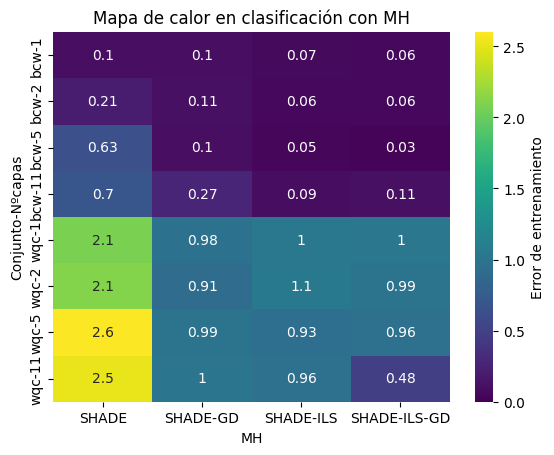

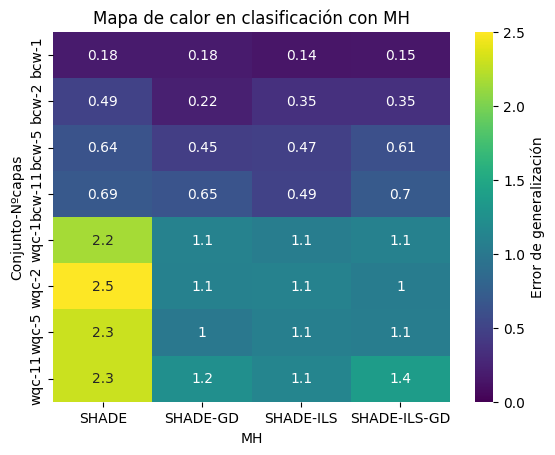

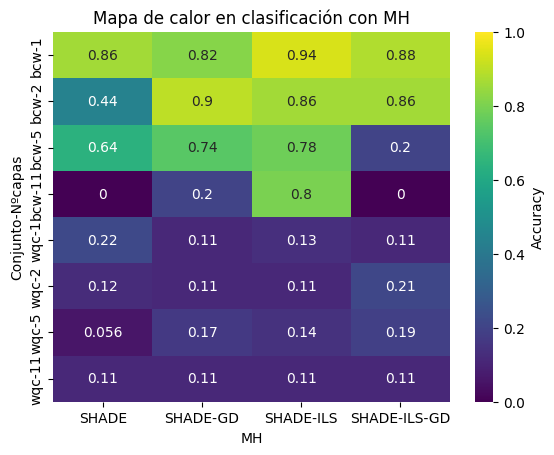

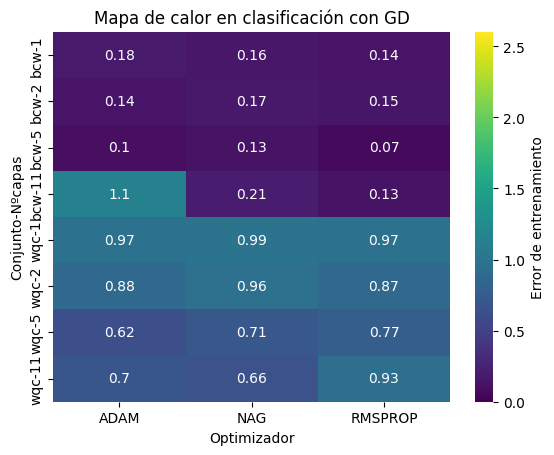

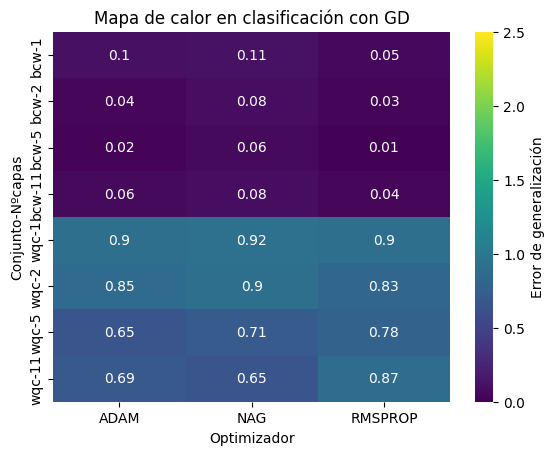

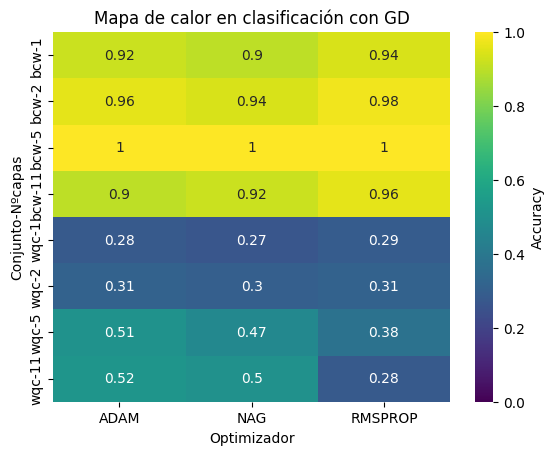

In [16]:
pivot_data_clas_mh = df_clas_mh.pivot_table(index=['dataset', 'layer'], columns='mh', values=['E', 'T', 'M'], aggfunc='mean')
pivot_data_clas_gd = df_clas_gd.pivot_table(index=['dataset', 'layer'], columns='gd', values=['E', 'T', 'M'], aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for generalization error across complexity and model size
ax = sns.heatmap(pivot_data_clas_mh['E'], annot=True, cmap='viridis',  vmin=0, vmax=2.6)
ax.set_title('Mapa de calor en clasificación con MH')
ax.set_xlabel('MH')
ax.set_ylabel('Conjunto-Nºcapas')
ax.collections[0].colorbar.set_label('Error de entrenamiento')
plt.show()
ax=sns.heatmap(pivot_data_clas_mh['T'], annot=True, cmap='viridis',  vmin=0, vmax=2.5)
ax.set_title('Mapa de calor en clasificación con MH')
ax.set_xlabel('MH')
ax.set_ylabel('Conjunto-Nºcapas')
ax.collections[0].colorbar.set_label('Error de generalización')
plt.show()
ax=sns.heatmap(pivot_data_clas_mh['M'], annot=True, cmap='viridis', vmax=1, vmin=0)
ax.set_title('Mapa de calor en clasificación con MH')
ax.set_xlabel('MH')
ax.set_ylabel('Conjunto-Nºcapas')
ax.collections[0].colorbar.set_label('Accuracy')
plt.show()



ax = sns.heatmap(pivot_data_clas_gd['E'], annot=True, cmap='viridis', vmin=0, vmax=2.6)
ax.set_title('Mapa de calor en clasificación con GD')
ax.set_xlabel('Optimizador')
ax.set_ylabel('Conjunto-Nºcapas')
ax.collections[0].colorbar.set_label('Error de entrenamiento')
plt.show()

ax = sns.heatmap(pivot_data_clas_gd['T'], annot=True, cmap='viridis',  vmin=0, vmax=2.5)
ax.set_title('Mapa de calor en clasificación con GD')
ax.set_xlabel('Optimizador')
ax.set_ylabel('Conjunto-Nºcapas')
ax.collections[0].colorbar.set_label('Error de generalización')
plt.show()

ax = sns.heatmap(pivot_data_clas_gd['M'], annot=True, cmap='viridis', vmax=1, vmin=0)
ax.set_title('Mapa de calor en clasificación con GD')
ax.set_xlabel('Optimizador')
ax.set_ylabel('Conjunto-Nºcapas')
ax.collections[0].colorbar.set_label('Accuracy')
plt.show()



pivot_data_reg_mh = df_reg_mh.pivot_table(index=['dataset', 'layer'], columns='mh', values=['E', 'T', 'M'], aggfunc='mean')
pivot_data_reg_gd = df_reg_gd.pivot_table(index=['dataset', 'layer'], columns='gd', values=['E', 'T', 'M'], aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for generalization error across complexity and model size
#sns.heatmap(pivot_data_reg_mh['E'], annot=True, cmap='viridis', vmin=0, vmax=280)
#sns.heatmap(pivot_data_reg_mh['T'], annot=True, cmap='viridis', vmin=0, vmax=150)
#sns.heatmap(pivot_data_reg_mh['M'], annot=True, cmap='viridis', vmin= -5, vmax=1)

plt.show()
#sns.heatmap(pivot_data_reg_gd['E'], annot=True, cmap='viridis', vmin=0, vmax=280)
#sns.heatmap(pivot_data_reg_gd['T'], annot=True, cmap='viridis', vmin=0, vmax=150)
#sns.heatmap(pivot_data_reg_gd['M'], annot=True, cmap='viridis', vmin=-5, vmax=1)
plt.show()
#plt.set_title('Error de entrenamiento')
#plt.show()

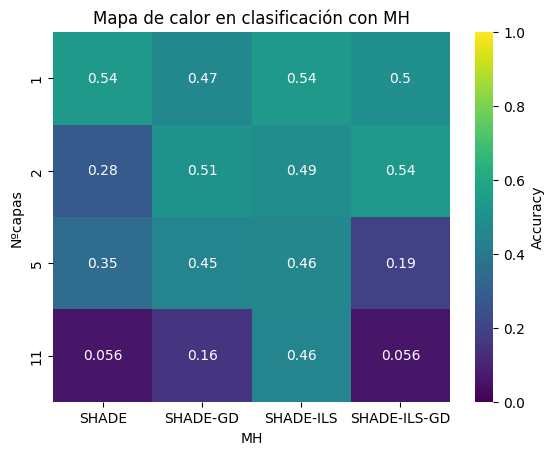

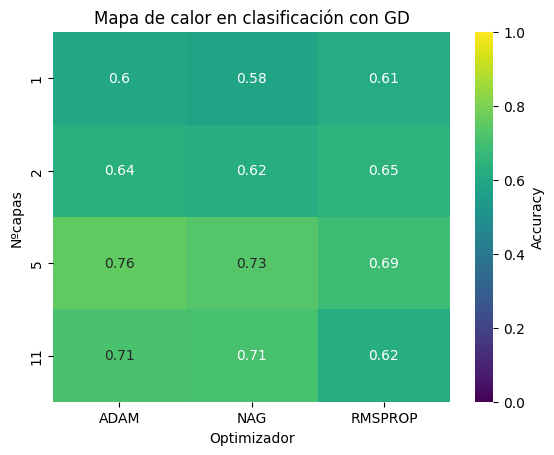

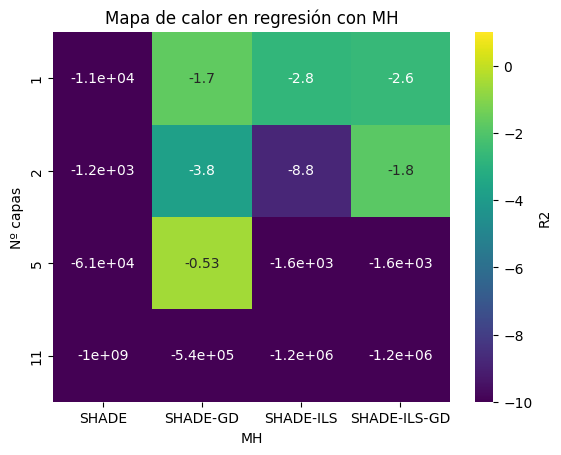

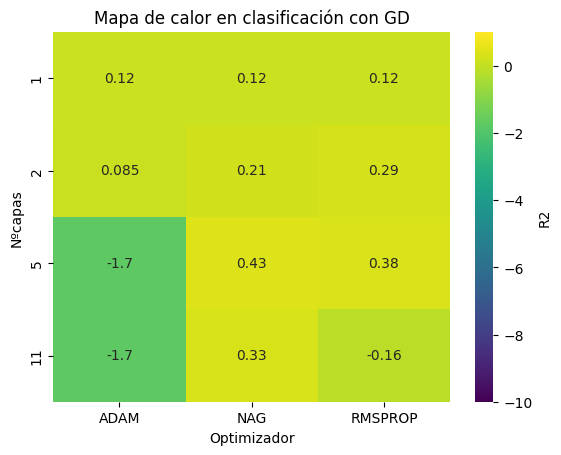

In [13]:
pivot_data_clas_mh_data = df_clas_mh_data_comb.pivot_table(index=['layer'], columns='mh', values=['E', 'T', 'M'], aggfunc='mean')
pivot_data_clas_gd_data = df_clas_gd_data_comb.pivot_table(index=['layer'], columns='gd', values=['E', 'T', 'M'], aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for generalization error across complexity and model size
#sns.heatmap(pivot_data_clas_mh_data['E'], annot=True, cmap='viridis',  vmin=0, vmax=1.5)
#sns.heatmap(pivot_data_clas_mh_data['T'], annot=True, cmap='viridis',  vmin=0, vmax=2)
ax=sns.heatmap(pivot_data_clas_mh_data['M'], annot=True, cmap='viridis', vmax=1, vmin=0)
ax.set_title('Mapa de calor en clasificación con MH')
ax.set_xlabel('MH')
ax.set_ylabel('Nºcapas')
ax.collections[0].colorbar.set_label('Accuracy')
plt.show()
#sns.heatmap(pivot_data_clas_gd_data['E'], annot=True, cmap='viridis', vmin=0, vmax=1.5)
#sns.heatmap(pivot_data_clas_gd_data['T'], annot=True, cmap='viridis',  vmin=0, vmax=2)
ax=sns.heatmap(pivot_data_clas_gd_data['M'], annot=True, cmap='viridis', vmax=1, vmin=0)
ax.set_title('Mapa de calor en clasificación con GD')
ax.set_xlabel('Optimizador')
ax.set_ylabel('Nºcapas')
ax.collections[0].colorbar.set_label('Accuracy')
plt.show()



pivot_data_reg_mh_data = df_reg_mh_data_comb.pivot_table(index=['layer'], columns='mh', values=['E', 'T', 'M'], aggfunc='mean')
pivot_data_reg_gd_data = df_reg_gd_data_comb.pivot_table(index=['layer'], columns='gd', values=['E', 'T', 'M'], aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for generalization error across complexity and model size
#sns.heatmap(pivot_data_reg_mh_data['E'], annot=True, cmap='viridis', vmin=0, vmax=280)
#sns.heatmap(pivot_data_reg_mh_data['T'], annot=True, cmap='viridis', vmin=0, vmax=150)
ax=sns.heatmap(pivot_data_reg_mh_data['M'], annot=True, cmap='viridis', vmin= -10, vmax=1)
ax.set_title('Mapa de calor en regresión con MH')
ax.set_xlabel('MH')
ax.set_ylabel('Nº capas')
ax.collections[0].colorbar.set_label('R2')
plt.show()

#sns.heatmap(pivot_data_reg_gd_data['E'], annot=True, cmap='viridis', vmin=0, vmax=280)
#sns.heatmap(pivot_data_reg_gd_data['T'], annot=True, cmap='viridis', vmin=0, vmax=150)
ax=sns.heatmap(pivot_data_reg_gd_data['M'], annot=True, cmap='viridis', vmin=-10, vmax=1)
ax.set_title('Mapa de calor en clasificación con GD')
ax.set_xlabel('Optimizador')
ax.set_ylabel('Nºcapas')
ax.collections[0].colorbar.set_label('R2')
plt.show()
#plt.set_title('Error de entrenamiento')
#plt.show()

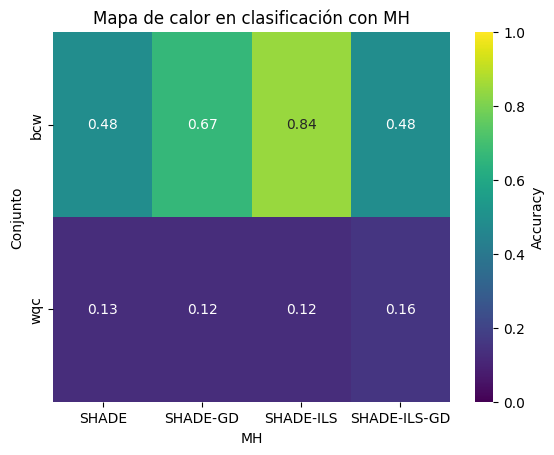

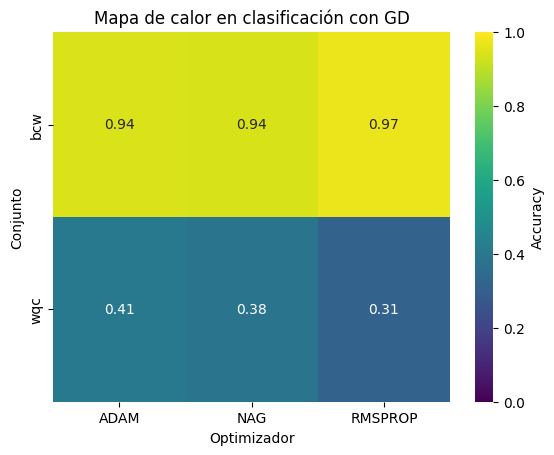

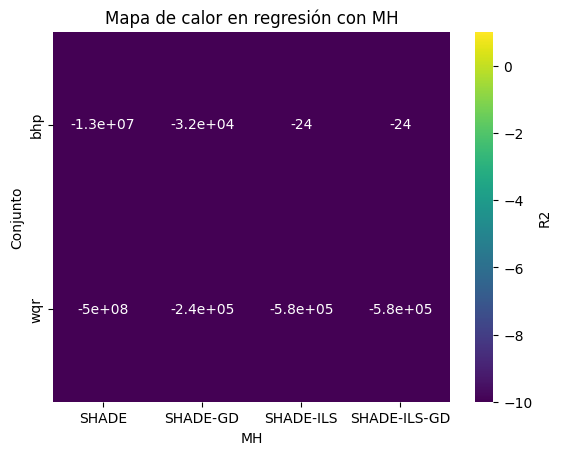

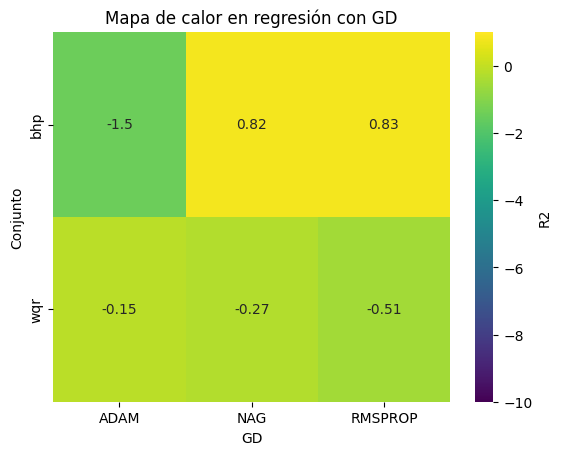

In [18]:
pivot_data_clas_mh_lay = df_clas_mh_layer_comb.pivot_table(index=['dataset'], columns='mh', values=['E', 'T', 'M'], aggfunc='mean')
pivot_data_clas_gd_lay = df_clas_gd_layer_comb.pivot_table(index=['dataset'], columns='gd', values=['E', 'T', 'M'], aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for generalization error across complexity and model size
#sns.heatmap(pivot_data_clas_mh_lay['E'], annot=True, cmap='viridis',  vmin=0, vmax=1.5)
#sns.heatmap(pivot_data_clas_mh_lay['T'], annot=True, cmap='viridis',  vmin=0, vmax=2)
ax=sns.heatmap(pivot_data_clas_mh_lay['M'], annot=True, cmap='viridis', vmax=1, vmin=0)
ax.set_title('Mapa de calor en clasificación con MH')
ax.set_xlabel('MH')
ax.set_ylabel('Conjunto')
ax.collections[0].colorbar.set_label('Accuracy')
plt.show()
plt.show()
#sns.heatmap(pivot_data_clas_gd_lay['E'], annot=True, cmap='viridis', vmin=0, vmax=1.5)
#ax=sns.heatmap(pivot_data_clas_gd_lay['T'], annot=True, cmap='viridis',  vmin=0, vmax=2)
ax=sns.heatmap(pivot_data_clas_gd_lay['M'], annot=True, cmap='viridis', vmax=1, vmin=0)
ax.set_title('Mapa de calor en clasificación con GD')
ax.set_xlabel('Optimizador')
ax.set_ylabel('Conjunto')
ax.collections[0].colorbar.set_label('Accuracy')
plt.show()

#plt.show()



pivot_data_reg_mh_lay = df_reg_mh_layer_comb.pivot_table(index=['dataset'], columns='mh', values=['E', 'T', 'M'], aggfunc='mean')
pivot_data_reg_gd_lay = df_reg_gd_layer_comb.pivot_table(index=['dataset'], columns='gd', values=['E', 'T', 'M'], aggfunc='mean')

import seaborn as sns
import matplotlib.pyplot as plt

# Heatmap for generalization error across complexity and model size
#sns.heatmap(pivot_data_reg_mh_lay['E'], annot=True, cmap='viridis', vmin=0, vmax=280)
#sns.heatmap(pivot_data_reg_mh_lay['T'], annot=True, cmap='viridis', vmin=0, vmax=150)
ax=sns.heatmap(pivot_data_reg_mh_lay['M'], annot=True, cmap='viridis', vmin= -10, vmax=1)
ax.set_title('Mapa de calor en regresión con MH')
ax.set_xlabel('MH')
ax.set_ylabel('Conjunto')
ax.collections[0].colorbar.set_label('R2')
plt.show()

#sns.heatmap(pivot_data_reg_gd_lay['E'], annot=True, cmap='viridis', vmin=0, vmax=280)
#sns.heatmap(pivot_data_reg_gd_lay['T'], annot=True, cmap='viridis', vmin=0, vmax=150)
ax=sns.heatmap(pivot_data_reg_gd_lay['M'], annot=True, cmap='viridis', vmin=-10, vmax=1)
ax.set_title('Mapa de calor en regresión con GD')
ax.set_xlabel('GD')
ax.set_ylabel('Conjunto')
ax.collections[0].colorbar.set_label('R2')
plt.show()
#plt.set_title('Error de entrenamiento')
#plt.show()

In [144]:
dif_clas_E = [a-b for a,b in zip(df_clas_gd['E'] , df_clas_mh['E'])]
dif_clas_T = [a-b for a,b in zip(df_clas_gd['T'] , df_clas_mh['T'])]
dif_clas_M = [a-b for a,b in zip(df_clas_gd['M'] , df_clas_mh['M'])]

dif_reg_E_ = [a-b for a,b in zip(df_reg_gd['E'] , df_reg_mh['E'])]
dif_reg_T = [a-b for a,b in zip(df_reg_gd['T'] , df_reg_mh['T'])]
dif_reg_M = [a-b for a,b in zip(df_reg_gd['M'] , df_reg_mh['M'])]

dif_clas_E_data = [a-b for a,b in zip(df_clas_gd_data_comb['E'] , df_clas_mh_data_comb['E'])]
dif_clas_T_data = [a-b for a,b in zip(df_clas_gd_data_comb['T'] , df_clas_mh_data_comb['T'])]
dif_clas_M_data = [a-b for a,b in zip(df_clas_gd_data_comb['M'] , df_clas_mh_data_comb['M'])]

dif_reg_E_data = [a-b for a,b in zip(df_reg_gd_data_comb['E'] , df_reg_mh_data_comb['E'])]
dif_reg_T_data = [a-b for a,b in zip(df_reg_gd_data_comb['T'] , df_reg_mh_data_comb['T'])]
dif_reg_M_data = [a-b for a,b in zip(df_reg_gd_data_comb['M'] , df_reg_mh_data_comb['M'])]


dif_clas_E_layer = [a-b for a,b in zip(df_clas_gd_layer_comb['E'] , df_clas_mh_layer_comb['E'])]
dif_clas_T_layer = [a-b for a,b in zip(df_clas_gd_layer_comb['T'] , df_clas_mh_layer_comb['T'])]
dif_clas_M_layer = [a-b for a,b in zip(df_clas_gd_layer_comb['M'] , df_clas_mh_layer_comb['M'])]

dif_reg_E_layer = [a-b for a,b in zip(df_reg_gd_layer_comb['E'] , df_reg_mh_layer_comb['E'])]
dif_reg_T_layer = [a-b for a,b in zip(df_reg_gd_layer_comb['T'] , df_reg_mh_layer_comb['T'])]
dif_reg_M_layer = [a-b for a,b in zip(df_reg_gd_layer_comb['M'] , df_reg_mh_layer_comb['M'])]

import scipy.stats as stats

# Perform the Shapiro-Wilk test
stat, p_value = stats.shapiro(dif_clas_E)

# Print the results
print('Statistics=%.3f, p-value=%.3f' % (stat, p_value))

# Interpret the result
alpha = 0.05
if p_value > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')

Statistics=0.911, p-value=0.038
Sample does not look Gaussian (reject H0)


In [145]:
stat, p_value = stats.wilcoxon(dif_clas_E, dif_reg_E)

print(f"Wilcoxon statistic for training: {stat}, P-value: {p_value}")

stat, p_value = stats.wilcoxon(dif_clas_T, dif_reg_T)

print(f"Wilcoxon statistic for generalization: {stat}, P-value: {p_value}")

stat, p_value = stats.wilcoxon(dif_clas_M, dif_reg_M)

print(f"Wilcoxon statistic for metrics: {stat}, P-value: {p_value}")


stat, p_value = stats.wilcoxon(dif_clas_E_layer, dif_reg_E_layer)

print(f"Wilcoxon statistic for training_layer: {stat}, P-value: {p_value}")

stat, p_value = stats.wilcoxon(dif_clas_T_layer, dif_reg_T_layer)

print(f"Wilcoxon statistic for generalization_layer: {stat}, P-value: {p_value}")

stat, p_value = stats.wilcoxon(dif_clas_M_layer, dif_reg_M_layer)

print(f"Wilcoxon statistic for metrics_layer: {stat}, P-value: {p_value}")

stat, p_value = stats.wilcoxon(dif_clas_E_data, dif_reg_E_data)

print(f"Wilcoxon statistic for training_data: {stat}, P-value: {p_value}")

stat, p_value = stats.wilcoxon(dif_clas_T_data, dif_reg_T_data)

print(f"Wilcoxon statistic for generalization_data: {stat}, P-value: {p_value}")

stat, p_value = stats.wilcoxon(dif_clas_M_data, dif_reg_M_data)

print(f"Wilcoxon statistic for metrics_data: {stat}, P-value: {p_value}")




Wilcoxon statistic for training: 80.0, P-value: 0.045679688453674316
Wilcoxon statistic for generalization: 14.0, P-value: 1.3113021850585938e-05
Wilcoxon statistic for metrics: 25.0, P-value: 0.00010764598846435547
Wilcoxon statistic for training_layer: 4.0, P-value: 0.21875
Wilcoxon statistic for generalization_layer: 0.0, P-value: 0.03125
Wilcoxon statistic for metrics_layer: 0.0, P-value: 0.03125
Wilcoxon statistic for training_data: 29.0, P-value: 0.4697265625
Wilcoxon statistic for generalization_data: 12.0, P-value: 0.0341796875
Wilcoxon statistic for metrics_data: 1.0, P-value: 0.0009765625


In [136]:
!pip install statsmodels

In [146]:

#from statsmodels.multivariate.hotelling import hotelling_t2
import numpy as np
from scipy.stats import f
# Example data: two groups with 3D measurements
group_a = np.array([[a,b,c] for a,b,c in zip(dif_clas_E,dif_clas_T,dif_clas_M)])
group_b = np.array([[a,b,c] for a,b,c in zip(dif_reg_E, dif_reg_T, dif_reg_M)])
mean_a = np.mean(group_a, axis=0)
mean_b = np.mean(group_b, axis=0)

# Calculate the covariance matrices
cov_a = np.cov(group_a, rowvar=False)
cov_b = np.cov(group_b, rowvar=False)

# Calculate the sample sizes
n_a = group_a.shape[0]
n_b = group_b.shape[0]

# Combined covariance matrix
pooled_cov = (n_a - 1) * cov_a + (n_b - 1) * cov_b
pooled_cov /= (n_a + n_b - 2)

# Hotelling's T-squared statistic
t_squared = (n_a * n_b) / (n_a + n_b) * (mean_a - mean_b).T @ np.linalg.inv(pooled_cov) @ (mean_a - mean_b)

# Degrees of freedom
df1 = group_a.shape[1]  # Number of variables (dimensions)
df2 = n_a + n_b - df1 - 1

# Calculate p-value
p_value = 1 - f.cdf(t_squared * (df2 / (n_a * n_b)), df1, df2)

print(f"Hotelling's T-squared: {t_squared}, P-value: {p_value}")

# Example data: two groups with 3D measurements
group_a = np.array([[a,b,c] for a,b,c in zip(dif_clas_E_data,dif_clas_T_data,dif_clas_M_data)])
group_b = np.array([[a,b,c] for a,b,c in zip(dif_reg_E_data, dif_reg_T_data, dif_reg_M_data)])
mean_a = np.mean(group_a, axis=0)
mean_b = np.mean(group_b, axis=0)

# Calculate the covariance matrices
cov_a = np.cov(group_a, rowvar=False)
cov_b = np.cov(group_b, rowvar=False)

# Calculate the sample sizes
n_a = group_a.shape[0]
n_b = group_b.shape[0]

# Combined covariance matrix
pooled_cov = (n_a - 1) * cov_a + (n_b - 1) * cov_b
pooled_cov /= (n_a + n_b - 2)

# Hotelling's T-squared statistic
t_squared = (n_a * n_b) / (n_a + n_b) * (mean_a - mean_b).T @ np.linalg.inv(pooled_cov) @ (mean_a - mean_b)

# Degrees of freedom
df1 = group_a.shape[1]  # Number of variables (dimensions)
df2 = n_a + n_b - df1 - 1

# Calculate p-value
p_value = 1 - f.cdf(t_squared * (df2 / (n_a * n_b)), df1, df2)

print(f"Hotelling's T-squared_data: {t_squared}, P-value: {p_value}")


group_a = np.array([[a,b,c] for a,b,c in zip(dif_clas_E_layer,dif_clas_T_layer,dif_clas_M_layer)])
group_b = np.array([[a,b,c] for a,b,c in zip(dif_reg_E_layer, dif_reg_T_layer, dif_reg_M_layer)])
mean_a = np.mean(group_a, axis=0)
mean_b = np.mean(group_b, axis=0)

# Calculate the covariance matrices
cov_a = np.cov(group_a, rowvar=False)
cov_b = np.cov(group_b, rowvar=False)

# Calculate the sample sizes
n_a = group_a.shape[0]
n_b = group_b.shape[0]

# Combined covariance matrix
pooled_cov = (n_a - 1) * cov_a + (n_b - 1) * cov_b
pooled_cov /= (n_a + n_b - 2)

# Hotelling's T-squared statistic
t_squared = (n_a * n_b) / (n_a + n_b) * (mean_a - mean_b).T @ np.linalg.inv(pooled_cov) @ (mean_a - mean_b)

# Degrees of freedom
df1 = group_a.shape[1]  # Number of variables (dimensions)
df2 = n_a + n_b - df1 - 1

# Calculate p-value
p_value = 1 - f.cdf(t_squared * (df2 / (n_a * n_b)), df1, df2)

print(f"Hotelling's T-squared_layer: {t_squared}, P-value: {p_value}")

Hotelling's T-squared: 12.781447004141667, P-value: 0.41251517726317133
Hotelling's T-squared_data: 13.421772336853662, P-value: 0.1682070084103594
Hotelling's T-squared_layer: 5.514608511966964, P-value: 0.3619580420019546
